# Who feeds the world ? And how wealthy are they ?
There are **folium maps** in this notebook. If they do not display or do not display well, we suggest you to **have a look at the `.html` file** that is located the same repository.

## Abstract <a name="abstract"></a>

Are countries that plant more maize richer than countries planting rice? Is it true that developed countries produce more meat? Are you better off being a food net exporter or importer? Are food prices more stable if you produce more food locally or trade more?

In this project we analyze **the effects that a country agricultural sector has on its different economic indicators**. The indicators of the agricultural sector we used are crops and livestock **production, exports and imports** of **crops, livestock and live animals**. For these, we use the data from the "**Global Food & Agriculture Statistics**" datasets. We quantify the **economic success** by **Gross Domestic Product (GDP)**, but also by **price stability**, as defined by low changes in **Consumer Price Indices (CPI)**. We further use the **Food and Agriculture Organization (FAO)** definition of **food self-sufficiency** to analyze its link to economic success and stability. 
After finding the results of the agricultural products most highly linked with economic success, we create **visualizations** in the form of **maps**. Through these timeline maps, we show how the production/export/import of important products has developed globally. We also use maps to visualize the **level of food self-sufficiency and price stability**.




## Research questions <a name="abstract2"></a>

We would like to work on the following research questions:

- Which **agricultural products** are the **most produced/exported/imported** globally?
- Which of them are **correlated more highly with GDP**?
- Can we **predict** which countries will have **further GDP growth** based on the repartition of their agricultural sector?
- How can we define **price stability**? How can we define **food self-sufficiency**? Is there a link?
- What is countries **agricultural trade balance**? Are countries that are net exporters or importers richer ? Are self-sufficient countries **richer** ?
- How does the geographical repartition of important agricultural products look like? Which countries are **net food exporters or importers**? How did this **evolve over the last few decades** ?


# Table of contents <a name="toc"></a>


[Abstract](#abstract)

[Research questions](#abstract2) 

[Table of contents](#toc)

1. [Data cleansing and preprocessing](#1)

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
        
    5. [Preprocessing the data set](#1E)
        
    6. [Making one uniformized dataframe](#1F)
    
    7. [The last filter](#1G)
        
2. [Data exploration and first observations](#2)
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)  
                
    3. [Structure of international trade and historical context](#2C)      
        
    4. [Economic classification of countries](#2D)    
        
3. [Descriptive data analysis](#3)

    1. [Production and consumption of food from a time-space geography point of view](#3A)

    2. [Food self-sufficiency](#3B)

    3. [Analysis of food production and trade with GDP](#3C)

    4. [Food prices stability and agricultural features](#3D)      

4. [Informed plan for next actions](#4)

**External imports:**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import json
import re
import requests
from bs4 import BeautifulSoup
from ipywidgets import interact
from IPython.display import display
import scipy.cluster.hierarchy as spc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from operator import itemgetter
from sklearn import preprocessing
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

**Setup:**

In [2]:
data_folder_path = "Scripts/Data/current_FAO/raw_files/"

files = {"Crops production" : "Production_Crops_E_All_Data_(Normalized).csv",
         "Food trade" : "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", 
         "Consumer price indices" : "ConsumerPriceIndices_E_All_Data_(Normalized).csv",
         "Macroeconomy" : "Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv",
         "Livestock production" : "Production_Livestock_E_All_Data_(Normalized).csv",
         "Live animals trade" : "Trade_LiveAnimals_E_All_Data_(Normalized).csv"
        }
interesting_datasets = files.keys()

## 1. Data cleansing and preprocessing <a name="1"></a>

In this part, we will load, explore and clean the dataset in order to remove typing errors, missing information, inaccuracies, and so on.

1. 

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
    
        1. [Removing unuseful data](#1Da)         
        
        2. [Handling of the missing data](#1Db)       
        
    5. [Preprocessing the data set](#1E)
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)
        
    6. [Making one uniformized dataframe](#1F)

### 1.A. Dataset description <a name="1A"></a>

Our main dataset is a subset of the **"Global Food & Agriculture Statistics"** that is found **in the proposed datasets list**. In this dataset, we have seen that we could work with the **production** as well as **import** and **export** quantities **per year** and **per country**. As far as food is concerned, we use **crops**, **livestock** and **live animals**. We have also found pieces of information about countries **GDP** and **CPI** in this database.

This database countains several files. We had a look of all the files. For food-related data about countries, we decided to focus on the following files:
- `Production_Crops_E_All_Data_(Normalized).csv` contains data about **crops production**.
- `Trade_Crops_Livestock_E_All_Data_(Normalized).csv` contains data about **food trade** (crops and livestock).
- `Production_Livestock_E_All_Data_(Normalized).csv` contains data about **livestock production**.
- `Trade_LiveAnimals_E_All_Data_(Normalized).csv` contains data about **live animals trade**.

For food-related data about countries, we decided to focus on the following files:
- `ConsumerPriceIndices_E_All_Data_(Normalized).csv` contains data about **consumer price indices (CPI)**.
- `Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv` contains data about **gross domestic product (GDP)** along with other macroeconomic indicators.

### 1.B. Loading the data set  <a name="1B"></a>

In [3]:
def load_datasets(datasets) :
    df = {}
    for dataset in datasets :
        file_path = data_folder_path + files[dataset]
        df[dataset] = pd.read_csv(file_path, encoding = "ISO-8859-1")
    return df

We **load each interresting dataset** in the dictionary `df` :

In [4]:
df = load_datasets(interesting_datasets)

### 1.C. Understanding the data set  <a name="1C"></a>

In this part, we will have a first look of the datasets in order to **get a first sense of the data**.

In [5]:
def display_df(df, datasets):
    for dataset in datasets :
        display(dataset, df[dataset].sample(5))

In order to see what does the datasets look like, we display a sample of 5 rows for each of them :

In [6]:
display_df(df, interesting_datasets)

'Crops production'

Area Code                         Area  Item Code  \
518373          72                     Djibouti       1800   
1769338        215  United Republic of Tanzania       1720   
2063689       5200                     Americas       1717   
2054881       5200                     Americas        223   
694619          84                       Greece        723   

                             Item  Element Code     Element  Year Code  Year  \
518373   Vegetables&Melons, Total          5510  Production       1967  1967   
1769338    Roots and Tubers,Total          5510  Production       2013  2013   
2063689             Cereals,Total          5510  Production       2000  2000   
2054881                Pistachios          5419       Yield       1977  1977   
694619                Spices, nes          5510  Production       2004  2004   

           Unit        Value Flag  
518373   tonnes       1667.0    A  
1769338  tonnes   10004800.0    A  
2063689  tonnes  530897160.0    A  
2054881   hg/ha      30246.0   Fc  
694619   tonnes          0.0  NaN

'Food trade'

Area Code                               Area  Item Code  \
14473425       5815  Low Income Food Deficit Countries       1901   
3608151          63                            Estonia       1904   
12414447       5200                           Americas       1944   
1155697          18                             Bhutan        829   
13917156       5502                          Melanesia       2071   

                      Item  Element Code          Element  Year Code  Year  \
14473425    Textile Fibres          5910  Export Quantity       1973  1973   
3608151        Animal fats          5610  Import Quantity       2006  2006   
12414447           Cereals          5922     Export Value       2008  2008   
1155697   Cigars, cheroots          5610  Import Quantity       1987  1987   
13917156       Bovine Meat          5622     Import Value       2008  2008   

              Unit       Value Flag  
14473425    tonnes   1744914.0    A  
3608151     tonnes      1422.0    A  
12414447  1000 US$  48936245.0    A  
1155697     tonnes         NaN    M  
13917156  1000 US$     35016.0    A

'Consumer price indices'

Area Code         Area  Item Code  \
18973         68       France      23012   
14294        167      Czechia      23012   
54612        217         Togo      23013   
38975        158        Niger      23012   
54378        176  Timor-Leste      23012   

                                                Item  Months Code     Months  \
18973  Consumer Prices, General Indices (2010 = 100)         7012   December   
14294  Consumer Prices, General Indices (2010 = 100)         7009  September   
54612     Consumer Prices, Food Indices (2010 = 100)         7009  September   
38975  Consumer Prices, General Indices (2010 = 100)         7012   December   
54378  Consumer Prices, General Indices (2010 = 100)         7007       July   

       Year Code  Year  Unit       Value Flag  Note  
18973       2001  2001   NaN   86.102875    X  2010  
14294       2001  2001   NaN   82.001871    X  2010  
54612       2009  2009   NaN  111.914000    X  2008  
38975       2011  2011   NaN  103.854689    X  2010  
54378       2011  2011   NaN  113.238897    X  2010

'Macroeconomy'

Area Code                                       Area  Item Code  \
468853        176                                Timor-Leste      22015   
59196          19           Bolivia (Plurinational State of)      22011   
164908        238                                   Ethiopia      22077   
467410        154  The former Yugoslav Republic of Macedonia      22016   
313693        142                                 Montserrat      22015   

                                                   Item  Element Code  \
468853                    Gross Fixed Capital Formation          6108   
59196                             Gross National Income          6110   
164908  Value Added (Manufacture of food and beverages)          6108   
467410  Value Added (Agriculture, Forestry and Fishing)          6129   
313693                    Gross Fixed Capital Formation          6131   

                               Element  Year Code  Year      Unit  \
468853          Value US$, 2005 prices       1970  1970  millions   
59196                        Value US$       2010  2010  millions   
164908          Value US$, 2005 prices       1996  1996  millions   
467410               Annual growth US$       2008  2008         %   
313693  Annual growth US$, 2005 prices       1974  1974         %   

               Value Flag  
468853           NaN  XAM  
59196   18783.277910  XAM  
164908    182.032886   Fc  
467410     52.286725   Fc  
313693     -1.344267   Fc

'Livestock production'

Area Code        Area  Item Code                  Item  Element Code  \
69961        129  Madagascar       1034                  Pigs          5111   
8951          14    Barbados       1746  Cattle and Buffaloes          5111   
54877         97     Hungary       1746  Cattle and Buffaloes          5111   
66665        122     Lesotho       1107                 Asses          5111   
71712        133        Mali       1016                 Goats          5111   

      Element  Year Code  Year  Unit      Value Flag  
69961  Stocks       1995  1995  Head  1592000.0  NaN  
8951   Stocks       1988  1988  Head    24000.0    A  
54877  Stocks       1990  1990  Head  1597600.0    A  
66665  Stocks       1976  1976  Head    89400.0  NaN  
71712  Stocks       1964  1964  Head  5100000.0    F

'Live animals trade'

Area Code                  Area  Item Code                  Item  \
471700        223                Turkey       1079               Turkeys   
42267          15    Belgium-Luxembourg       1096                Horses   
479550        225  United Arab Emirates        866                Cattle   
383365        183               Romania       1079               Turkeys   
183429         79               Germany       1083  Pigeons, other birds   

        Element Code          Element  Year Code  Year       Unit   Value Flag  
471700          5922     Export Value       1985  1985   1000 US$   159.0  NaN  
42267           5622     Import Value       1977  1977   1000 US$  9546.0  NaN  
479550          5608  Import Quantity       1962  1962       Head     0.0  NaN  
383365          5609  Import Quantity       1981  1981  1000 Head     0.0  NaN  
183429          5909  Export Quantity       1996  1996  1000 Head     0.0  NaN

At first glance, our datasets **seem very clean**.

Each of our dataset contains **a column "Year"** and a column that is named **"Area"**. This is a great news for us since we want to do a both **geographical and time-related analysis**.

The column **"Area"** correspond to the country except it **may contains a group of country** (e.g. "Eastern Europe").

### 1.D. Cleansing the data set  <a name="1D"></a>

In this part, we will **clean the datasets**. The **final goal is to produce one uniformized dataset** on which we could work (see [1.F.](#1F)).

In a very simplistic way, such a cleaned and uniformized dataset may look like this :

    Country | Year | GDP | CPI | Food production features | Food trade features

1.  
    4. 
    
        1. [Removing unusefull data](#1Da)         
    
            1. [Extracting GDP from the "Macroeconomy" dataset](#1Dai)
            
            2. [Extracting crops harvested area, production, seed and yield from the "Crops production" dataset](#1Daii)
            
            3. [Extracting stocks production from the "Livestock production" dataset](#1Daiii)
            
            4. [Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets](#1Daiv)
            5. [Extracting average CPI of each year from the "Consumer price indices" dataset](#1Dav)
            
            6. [Removing areas which are not countries](#1Davi)
        
        2. [Handling of the missing data](#1Db)
        
            1. [Highlighting the problem](#1Dbi)
            
            2. [Proposed correction](#1Dbii)     

#### 1.D.a. Removing unuseful data  <a name="1Da"></a>

In this section, we will create dataframes in `df_useful` which correspond to previous dataframes **without the unuseful data**.

In [7]:
df_useful = {}

##### 1.D.a.i. Extracting GDP from the "Macroeconomy" dataset <a name="1Dai"></a>
The "Macroeconomy" dataset contains **many different measures**: Gross Fixed Capital Formation, Gross National Income, Value Added (Total Manufacturing), ... We are **only interested in Gross Domestic Product**. Therefore, we extract it Gross Domestic Product from the "Macroeconomy" dataset. In order to have uniformisation among values, we choose the US$ value. All of them have the same unit (millions US\\$) so we can drop the "Unit" column as well.

In [8]:
def extract_GDP(df):
    def selection_GDP(df):
        return df['Item']=='Gross Domestic Product'
    def selection_US_dollars(df):
        return df['Element']=="Value US$"
    def drop_columns(df):
        dropped_colmuns = ["Item Code", "Item", "Element Code", "Element", "Flag", "Year Code", "Unit"]
        return df.drop(columns = dropped_colmuns)
    return drop_columns(df[selection_GDP(df)&selection_US_dollars(df)])

In [9]:
df_useful["GDP"] = extract_GDP(df["Macroeconomy"])

We can have have a look at a sample of the extrated dataset:

In [10]:
display(df_useful["GDP"].sample(5))

Area Code      Area  Year          Value
46603          23    Belize  1973      67.557479
480671        223    Turkey  2006  530917.409080
268534        124     Libya  2011   40587.263612
507670        228      USSR  2004            NaN
429188        198  Slovenia  1974            NaN

And we can plot GDP in million US$ for different countries for the period 1970-2015:

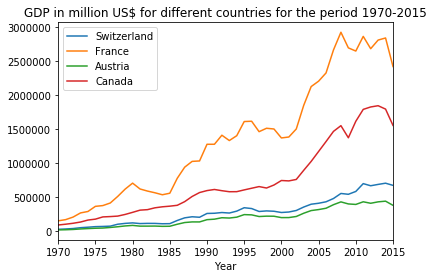

In [11]:
select_switzerland = df_useful["GDP"]['Area']=='Switzerland'
select_france = df_useful["GDP"]['Area']=='France'
select_austria = df_useful["GDP"]['Area']=='Austria'
select_canada = df_useful["GDP"]['Area']=='Canada'
ax = df_useful["GDP"][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

For dissolute or new countries, we have some Nan values (before appearing or after dissolution) as in this next example :

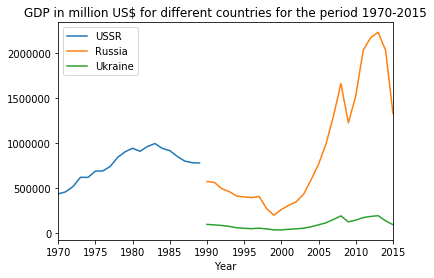

In [12]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

##### 1.D.a.ii. Extracting crops harvested area, production, seed and yield from the "Crops production" dataset<a name="1Daii"></a>
We want to extract crops **harvested area**, **production**, **seed** and **yield** from the **"Crops production" dataset**. As all crops are not food crops, we request the [World crops database](https://world-crops.com/food-crops/) to **keep only the food crops**.

In [13]:
def get_food_crops():
    #Return a list of crops categorized as food crops https://world-crops.com/food-crops/
    url="https://world-crops.com/food-crops/"
    r=requests.get(url,headers={"User-Agent": "XY"})
    soup=BeautifulSoup(r.text,'html.parser')
    elements_temp=soup.find_all('a',href=re.compile("^../"))
    elements=[el.text for el in elements_temp]
    
    #only 40 elements are displayed on each page->iterating on the total list
    for i in range(40,401,40):
        url_i=url+"?ss="+str(i)
        r=requests.get(url_i,headers={"User-Agent":"XY"})
        soup=BeautifulSoup(r.text,'html.parser')
        new_elements=soup.find_all('a',href=re.compile("^../"))
        elements+=[el.text for el in new_elements]
    return elements

def inclusive_search(string,elements):
    #returns true if the string can be found in elements. The search removes special characters from string in order to include more positive results
    string=string.lower()
    delimiters = ",", "(","&",")"," and "," "
    pattern = '|'.join(map(re.escape, delimiters))
    strings=list(filter(None,re.split(pattern,string)))
    found=False
    for s in strings:
        if s=="nes":
            continue
        for el in elements:
            found=(s in el.split())
            if found==False and s[-1]=="s":
                found=s[:-1] in el.split()
            if found==False and s[-2:]=="es":
                found=s[:-2] in el.split()
            if found==False and s[-3:]=="ies":
                found=s[:-3]+"y" in el.split()
            if found==True:
                return found
    return found


def get_food_crop_data(df):    
    #extracts the food crop data, returns 4 df: Area,Production,Seed and yield    
    df=df.copy()
    food_crops=list(map(lambda x: x.lower(),get_food_crops()))              
    crop_types_df=df[['Item','Value']].groupby('Item').sum()
    crop_types_df=crop_types_df[list(map(lambda x : inclusive_search(x,food_crops) , crop_types_df.index ))]   
    food_crop_df=df[df.Item.apply(lambda x: x in crop_types_df.index)]
    return (food_crop_df[food_crop_df.Element=='Area harvested'],
            food_crop_df[food_crop_df.Element=='Production'],
            food_crop_df[food_crop_df.Element=='Seed'],
            food_crop_df[food_crop_df.Element=='Yield'])
  
food_crop_area_df , food_crop_production_df , food_crop_seed_df , food_crop_yield_df = get_food_crop_data(df["Crops production"])

In [14]:
df_useful['Crops Production'] = food_crop_production_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

We check everything is fine by looking at samples for each of the new dataframes:

In [15]:
display('Crops Production', df_useful['Crops Production'].sample(5))

'Crops Production'

Area Code                               Area  \
1175310        149                              Nepal   
2561790       5815  Low Income Food Deficit Countries   
2269273       5305                       Western Asia   
1640471        216                           Thailand   
326189         351                              China   

                                Item  Year    Unit      Value  
1175310  Chillies and peppers, green  1966  tonnes        NaN  
2561790                   Sugar beet  1984  tonnes  1472600.0  
2269273                        Pears  2007  tonnes   543571.0  
1640471                 Cocoa, beans  1998  tonnes      400.0  
326189     Cauliflowers and broccoli  1966  tonnes   452603.0

We also make some plots to have a first understanding of the dataset:

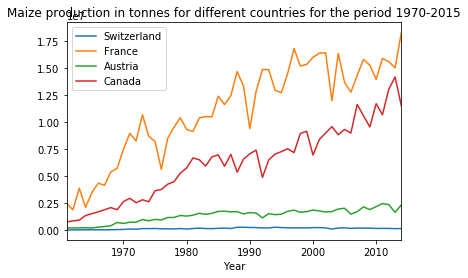

In [16]:
select_Maize = df_useful['Crops Production']['Item']=='Maize'
maize_df = df_useful['Crops Production'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize production in tonnes for different countries for the period 1970-2015')

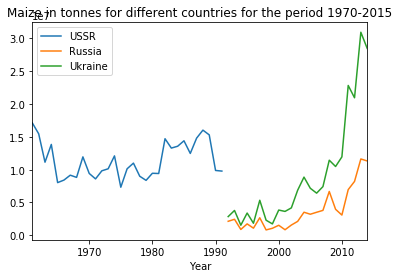

In [17]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize in tonnes for different countries for the period 1970-2015')

##### 1.D.a.iii. Extracting stocks production from the "Livestock production" dataset<a name="1Daiii"></a>

We want to extract **stocks production** from the **"Livestock production" dataset**. Again, we drop the columns that are useless for us and have a first look of the data with a sample and some plots.

In [18]:
selection_stocks = df['Livestock production']["Element"] == 'Stocks'
df_useful['Livestock production'] = df['Livestock production'][selection_stocks].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [19]:
display(df_useful['Livestock production'].sample(5))

Area Code         Area             Item  Year       Unit       Value
83330         156  New Zealand  Sheep and Goats  1982       Head  70394203.0
63586         114        Kenya         Chickens  1993  1000 Head     20823.0
124561        235   Uzbekistan           Camels  2010       Head     20000.0
35033          55     Dominica            Goats  1965       Head      4900.0
118829        227       Tuvalu         Beehives  1998         No        35.0

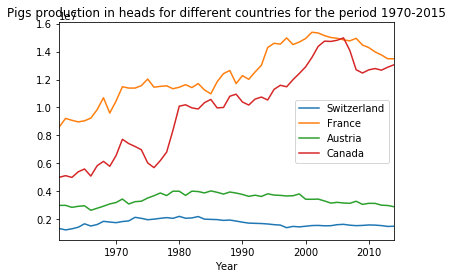

In [20]:
select_pigs = df_useful['Livestock production']['Item']=='Pigs'
pigs_df = df_useful['Livestock production'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs production in heads for different countries for the period 1970-2015')

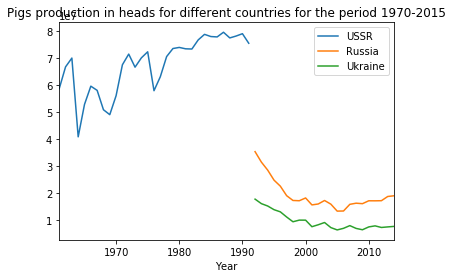

In [21]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs production in heads for different countries for the period 1970-2015')

##### 1.D.a.iv. Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets<a name="1Daiv"></a>
Now, we extract **import and export quantities** from the **"Live animals trade" and "Crops trade" datasets**, having again some samples and some plots.

In [22]:
selection_import_quantities = df['Live animals trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Live animals trade']["Element"] == 'Export Quantity'

df_useful['Live animals import quantities'] = df['Live animals trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Live animals export quantities'] = df['Live animals trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [23]:
display(df_useful['Live animals import quantities'].sample(5))

Area Code                             Area             Item  Year  \
408351        186            Serbia and Montenegro           Horses  2003   
346643        164  Pacific Islands Trust Territory           Cattle  1976   
651197       5803   Small Island Developing States           Cattle  1966   
477192        226                           Uganda  Sheep and Goats  1984   
5               2                      Afghanistan           Cattle  1966   

        Unit    Value  
408351  Head     46.0  
346643  Head      0.0  
651197  Head  21952.0  
477192  Head      0.0  
5       Head      NaN

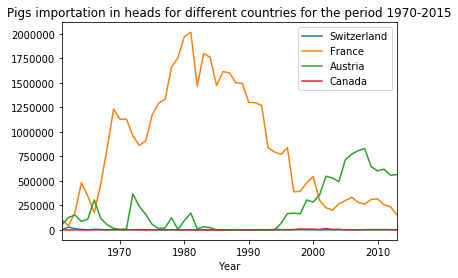

In [24]:
select_pigs = df_useful['Live animals import quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals import quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs importation in heads for different countries for the period 1970-2015')

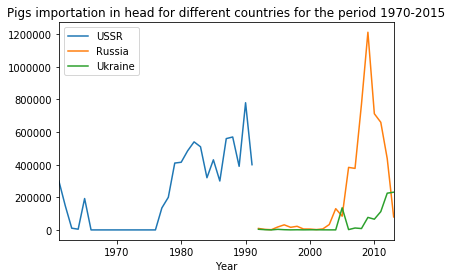

In [25]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs importation in head for different countries for the period 1970-2015')

In [26]:
display(df_useful['Live animals export quantities'].sample(5))

Area Code                                     Area              Item  \
591676       5304                       South-Eastern Asia  Animals live nes   
234085        105                                   Israel             Goats   
637482       5706                           European Union          Beehives   
199033         89                                Guatemala          Chickens   
660115       5817  Net Food Importing Developing Countries            Cattle   

        Year       Unit      Value  
591676  1964       Head        NaN  
234085  1984       Head        NaN  
637482  1997         No        NaN  
199033  1965  1000 Head       75.0  
660115  1980       Head  1499637.0

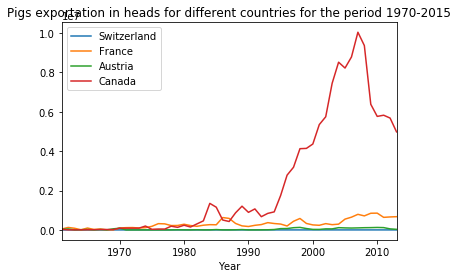

In [27]:
select_pigs = df_useful['Live animals export quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals export quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs exportation in heads for different countries for the period 1970-2015')

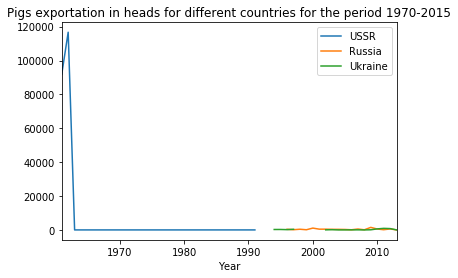

In [28]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs exportation in heads for different countries for the period 1970-2015')

In [29]:
selection_import_quantities = df['Food trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Food trade']["Element"] == 'Export Quantity'

df_useful['Food import quantities'] = df['Food trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Food export quantities'] = df['Food trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [30]:
display(df_useful['Food import quantities'].sample(5))

Area Code                   Area                             Item  \
946392           15     Belgium-Luxembourg  Fat, liver prepared (foie gras)   
1086737          53                  Benin          Tobacco, unmanufactured   
9083083         186  Serbia and Montenegro                  Coffee, roasted   
12075497       5102          Middle Africa                Meat Bovine Fresh   
2144393         351                  China                        Cider etc   

          Year    Unit    Value  
946392    1992  tonnes    105.0  
1086737   1980  tonnes    748.0  
9083083   1993  tonnes   3750.0  
12075497  1983  tonnes  27261.0  
2144393   2010  tonnes   9128.0

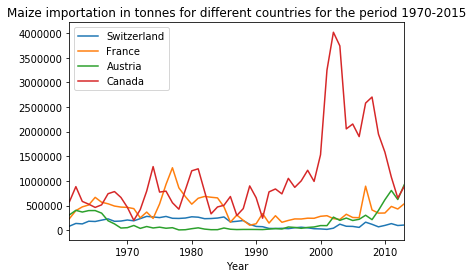

In [31]:
select_Maize = df_useful['Food import quantities']['Item']=='Maize'
maize_df = df_useful['Food import quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize importation in tonnes for different countries for the period 1970-2015')

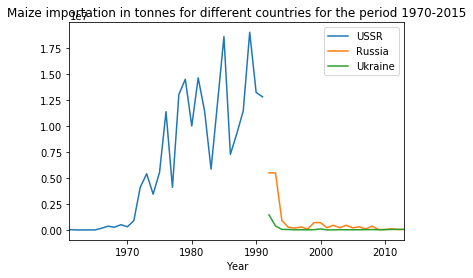

In [32]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize importation in tonnes for different countries for the period 1970-2015')

In [33]:
display(df_useful['Food export quantities'].sample(5))

Area Code                              Area                    Item  \
1241026          19  Bolivia (Plurinational State of)   Sugar Raw Centrifugal   
2814035         107                     Côte d'Ivoire               Meat, nes   
4329296          84                            Greece              Oil, maize   
7216978         153                     New Caledonia  Eggplants (aubergines)   
12410214       5200                          Americas         Whey, condensed   

          Year    Unit  Value  
1241026   1986  tonnes    0.0  
2814035   1997  tonnes    0.0  
4329296   1962  tonnes    0.0  
7216978   1999  tonnes    NaN  
12410214  1962  tonnes    0.0

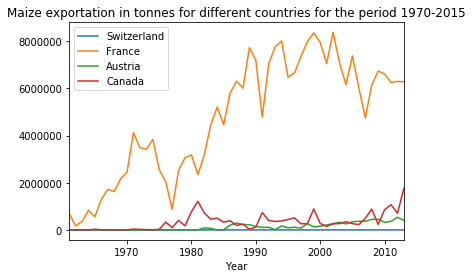

In [34]:
select_Maize = df_useful['Food export quantities']['Item']=='Maize'
maize_df = df_useful['Food export quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize exportation in tonnes for different countries for the period 1970-2015')

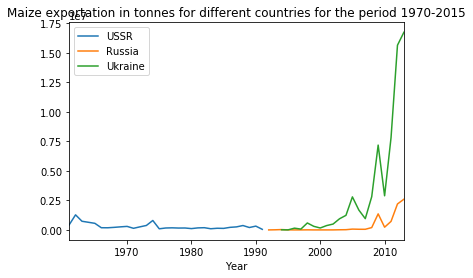

In [35]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize exportation in tonnes for different countries for the period 1970-2015')

##### 1.D.a.v. Extracting average CPI of each year from the "Consumer price indices" dataset<a name="1Dav"></a>

The **"Consumer price indices" dataset** contains **monthly data**. In order to have a **uniform dataframe**, and as other dataframes have **yearly data**, we will group it by (Country, Year) and compute the monthly mean for every year. Then we add a column to show the relative change in CPI, as this is what measures inflation, according to the following formula:

$$\frac{CPI_t - CPI_{t-1}}{CPI_{t-1}}$$

In [36]:
df_useful['Consumer price indices'] =  df['Consumer price indices'][['Area','Year','Value']] \
                                        .dropna() \
                                        .groupby(['Area',"Year"]) \
                                        .mean() \
                                        .reset_index() \
                                        .dropna()

In [37]:

#We calculate the relative change in CPI for each year relative to last years CPI - this indicates yearly inflation. The first year in each area is set to 0.


df_useful['Consumer price indices']['Value'] = np.where(df_useful['Consumer price indices']['Area'] == df_useful['Consumer price indices']['Area'].shift(1),
         ((df_useful['Consumer price indices']['Value'] - df_useful['Consumer price indices']['Value'].shift(1))/df_useful['Consumer price indices']['Value'].shift(1)) * 100, 0)




In [38]:
display(df_useful['Consumer price indices'].head(5))

Area  Year      Value
0  Afghanistan  2004   0.000000
1  Afghanistan  2005  11.606340
2  Afghanistan  2006   7.254896
3  Afghanistan  2007   8.482889
4  Afghanistan  2008  30.554940

With samples and plots, we remark that this dataset **only starts in 2000** wheareas other ones start in 1970.

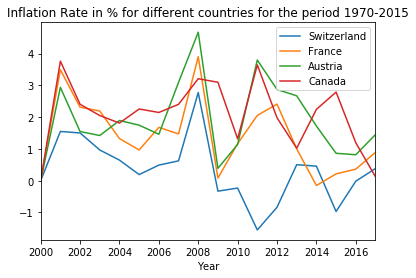

In [39]:
select_switzerland = df_useful['Consumer price indices']['Area']=='Switzerland'
select_france = df_useful['Consumer price indices']['Area']=='France'
select_austria = df_useful['Consumer price indices']['Area']=='Austria'
select_canada = df_useful['Consumer price indices']['Area']=='Canada'
ax = df_useful['Consumer price indices'][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful['Consumer price indices'][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Inflation Rate in % for different countries for the period 1970-2015')

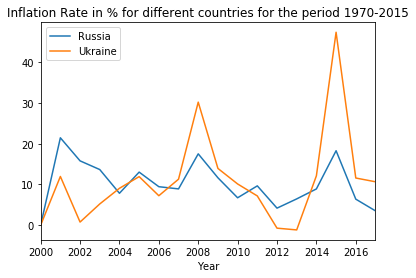

In [40]:
select_russia = df_useful["Consumer price indices"]['Area']=='Russian Federation'
select_ukraine = df_useful["Consumer price indices"]['Area']=='Ukraine'
ax = df_useful["Consumer price indices"][select_russia].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["Consumer price indices"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(['Russia', 'Ukraine'])
_ = ax.set_title('Inflation Rate in % for different countries for the period 1970-2015')

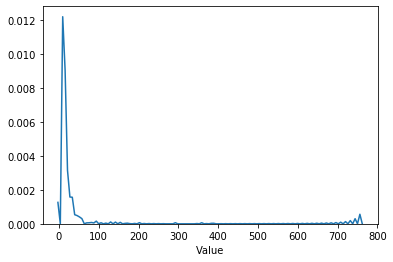

In [41]:
_ = sns.distplot(abs(df_useful["Consumer price indices"]["Value"]), rug=False, hist=False)

In [42]:
#looking at the cases where food prices increased over 100% during one year
df_useful["Consumer price indices"].loc[df_useful["Consumer price indices"]["Value"] > 100]

Area  Year       Value
55                                Angola  2001  152.561015
56                                Angola  2002  108.897433
851     Democratic Republic of the Congo  2001  359.936605
1280                              Guinea  2010  292.596028
2636               Sao Tome and Principe  2014  759.321212
2801                     Solomon Islands  2012  203.559117
2833                         South Sudan  2016  386.378414
2834                         South Sudan  2017  130.056890
3283  Venezuela (Bolivarian Republic of)  2015  171.224360
3284  Venezuela (Bolivarian Republic of)  2016  142.586732

It seems that the formula calculating food price inflation is actually correct. These are realistic cases where the price increased by over 100% in the span of a year. 

##### 1.D.a.vi. Removing areas which are not countries <a name="1Davi"></a>

Having a more detailled look at the dataset, we have remarked that the **areas which are real countries** are exactely the ones with an "Area Code" below $5000$ but not in $[261, 269]$.

In [43]:
#remove Area code >= 5000 or in [261, 269] (EU)
for df_name in df_useful :
    if 'Area Code' in df_useful[df_name].keys() : 
        print ("Removing areas which are not countries in", df_name)
        selection_countries = df_useful[df_name]['Area Code']<261 
        selection_countries = selection_countries | (df_useful[df_name]['Area Code']>269)
        selection_countries = selection_countries & (df_useful[df_name]['Area Code']<5000)
        df_useful[df_name] = df_useful[df_name][selection_countries]
        display(df_useful[df_name].sample(5))
    else :
        print (df_name, "is already clean")

Removing areas which are not countries in GDP


Area Code              Area  Year         Value
232665        106             Italy  2000  1.141759e+06
293489        127  Marshall Islands  2001  1.152282e+02
497328        229    United Kingdom  1991  1.142766e+06
405822        192        San Marino  2012  1.800606e+03
490254        226            Uganda  1975  2.790756e+03

Removing areas which are not countries in Crops Production


Area Code        Area                           Item  Year    Unit  \
222876          27    Bulgaria  Broad beans, horse beans, dry  2008  tonnes   
425657          48  Costa Rica                     Pineapples  1985  tonnes   
1099007        138      Mexico                Castor oil seed  2013  tonnes   
1735413        230     Ukraine      Cauliflowers and broccoli  2010  tonnes   
858205         104     Ireland        Fruit excl Melons,Total  1963  tonnes   

           Value  
222876      17.0  
425657   27257.0  
1099007      0.0  
1735413  25600.0  
858205   45000.0

Removing areas which are not countries in Livestock production


Area Code        Area                  Item  Year       Unit  \
118403        223      Turkey  Cattle and Buffaloes  1994       Head   
75246         138      Mexico                Horses  2008       Head   
14255          20    Botswana                  Pigs  1963       Head   
6986           52  Azerbaijan         Poultry Birds  2001  1000 Head   
63133         108  Kazakhstan                Camels  2009       Head   

             Value  
118403  12226000.0  
75246    6350000.0  
14255       6100.0  
6986       14741.0  
63133     148300.0

Removing areas which are not countries in Live animals import quantities


Area Code       Area    Item  Year  Unit     Value
21076          10  Australia   Goats  1965  Head       0.0
32472          13    Bahrain   Sheep  1997  Head  319970.0
452930        216   Thailand  Cattle  1989  Head    8991.0
269330        123    Liberia  Horses  1973  Head      11.0
206458         91     Guyana   Goats  1970  Head       NaN

Removing areas which are not countries in Live animals export quantities


Area Code                  Area                  Item  Year  \
381441        183               Romania             Buffaloes  1965   
307987        144            Mozambique                  Pigs  1994   
326739        156           New Zealand                 Ducks  2000   
468619        223                Turkey  Pigeons, other birds  1978   
100996         96  China, Hong Kong SAR                 Goats  1993   

             Unit  Value  
381441       Head    NaN  
307987       Head    0.0  
326739  1000 Head   53.0  
468619  1000 Head    0.0  
100996       Head    0.0

Removing areas which are not countries in Food import quantities


Area Code               Area                            Item  Year  \
8397503         117  Republic of Korea        Alfalfa meal and pellets  2013   
10500840        223             Turkey                        Rapeseed  1997   
9572632          38          Sri Lanka                Butter, cow milk  2010   
9076520         272             Serbia                          Tallow  2010   
4159100          79            Germany  Juice, pineapple, concentrated  2002   

            Unit    Value  
8397503   tonnes  17155.0  
10500840  tonnes     38.0  
9572632   tonnes    810.0  
9076520   tonnes     24.0  
4159100   tonnes  16588.0

Removing areas which are not countries in Food export quantities


Area Code         Area                       Item  Year    Unit  \
5230216        104      Ireland                  Whey, dry  1988  tonnes   
11846            2  Afghanistan         Vegetables, frozen  1988  tonnes   
4740357         95     Honduras            Milk Equivalent  2008  tonnes   
5481811        110        Japan  Cauliflowers and broccoli  1992  tonnes   
5955771        121      Lebanon    Meat, pig, preparations  2007  tonnes   

           Value  
5230216  27061.0  
11846        NaN  
4740357  27043.0  
5481811      0.0  
5955771      1.0

Consumer price indices is already clean


#### 1.D.b. Handling of the missing data  <a name="1Db"></a>

In this section, we will explain how we will handle the missing data in previous dataframes for maps.

##### 1.D.b.i. Highlighting the problem  <a name="1Dbi"></a> 

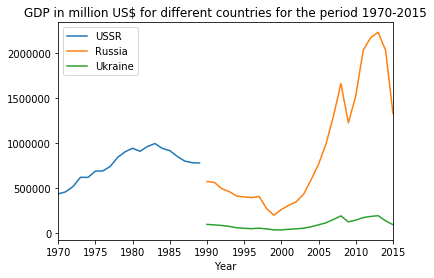

In [44]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

In order to **vizualize folium maps**, we need to **associate each country a value**. The geojson file that we use is not timestamped and **only countries that exist nowadays** are inside it. As **some countries has been dissolved** during the past 50 years, our folium maps won't be complete. For instance, we do not have any value for Ukraine from 1970 to 1989. Our idea to fix this issue is presented in the next paragraph.

##### 1.D.b.ii. Proposed correction  <a name="1Dbii"></a> 


Our idea is to **map the former country value to each of the current ones**. For instance in 1982, USSR GDP is around one trillion \\$. Therefore, if we associate (**only for folium map purposes**) this value to each current country that succeeded USSR, **all these countries will appear the same color** in the folium map, i.e. all the USSR area will appear the same color (and the good one).

In order to do so, one need to **identify which countries appeared and disappeared** from the dataset and **at which year**. Then we will use this result along with some **historical research** in our `visualise_world_data_folium` function ([1.E.a.](#1Ea)).

In [45]:
countries_formation_years = {}
for country in df_useful["GDP"]["Area"].unique():
    selection = df_useful["GDP"]["Area"] == country
    year_in, year_out = df_useful["GDP"][selection].dropna()["Year"].min(), df_useful["GDP"][selection].dropna()["Year"].max()
    for year in (year_in, year_out):
        if year not in countries_formation_years :
            countries_formation_years[year] = []
    countries_formation_years[year_in].append((country,'+'))
    countries_formation_years[year_out].append((country,'-'))

countries_formation_years.pop(1970)
countries_formation_years.pop(2015)
for year in sorted(list(countries_formation_years)):
    print (year, countries_formation_years[year])

1988 [('Yemen Ar Rp', '-'), ('Yemen Dem', '-')]
1989 [('Czechoslovakia', '-'), ('Ethiopia PDR', '-'), ('USSR', '-'), ('Yemen', '+'), ('Yugoslav SFR', '-')]
1990 [('Armenia', '+'), ('Azerbaijan', '+'), ('Belarus', '+'), ('Bosnia and Herzegovina', '+'), ('Croatia', '+'), ('Czechia', '+'), ('Eritrea', '+'), ('Estonia', '+'), ('Ethiopia', '+'), ('Georgia', '+'), ('Kazakhstan', '+'), ('Kyrgyzstan', '+'), ('Latvia', '+'), ('Lithuania', '+'), ('Montenegro', '+'), ('Republic of Moldova', '+'), ('Russian Federation', '+'), ('Serbia', '+'), ('Slovakia', '+'), ('Slovenia', '+'), ('Tajikistan', '+'), ('The former Yugoslav Republic of Macedonia', '+'), ('Timor-Leste', '+'), ('Turkmenistan', '+'), ('Ukraine', '+'), ('Uzbekistan', '+')]
1999 [('Kosovo', '+')]
2005 [('Curaçao', '+'), ('Sint Maarten (Dutch Part)', '+')]
2007 [('Sudan (former)', '-')]
2008 [('South Sudan', '+'), ('Sudan', '+')]
2012 [('Netherlands Antilles (former)', '-')]


### 1.E. Preprocessing the data set  <a name="1E"></a>

In this part, we will finish prepocessing the datasets. More precisely, we will deal with **country names** and **normalizing** the features.

1.  
    5. 
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)

#### 1.E.a. Converting country names between different naming conventions  <a name="1Ea"></a>
Some countries have **different names in the geojson file and in the dataset**. We first start by correcting them.

In [46]:
# Useful method for name correction
def correct_country_names(old_name, dic):
    if old_name in dic.keys() :
        return dic[old_name]
    return old_name

In [47]:
# Declaring dictionary with name correction
dic = {'Czechia': "Czech Republic",
       'Russian Federation':'Russia',
       "Serbia":"Republic of Serbia",
       'The former Yugoslav Republic of Macedonia':'Macedonia',
       'China, mainland':'China',
       'Viet Nam':'Vietnam',
       'Venezuela (Bolivarian Republic of)':'Venezuela',
       'Iran (Islamic Republic of)':'Iran',
       'Syrian Arab Republic':"Syria",
       'Bolivia (Plurinational State of)': 'Bolivia',
       "Côte d'Ivoire": "Ivory Coast",
       'Congo':"Republic of the Congo",
       "Lao People's Democratic Republic":'Laos',
       "Democratic People's Republic of Korea":"North Korea",
       'Republic of Korea':"South Korea",
       'USSR':['Armenia',
               'Azerbaijan',
               'Belarus',
               'Estonia',
               'Georgia',
               'Kazakhstan',
               'Kyrgyzstan',
               'Latvia',
               'Lithuania',
               'Montenegro',
               'Republic of Moldova',
               'Russia',
               'Republic of Serbia',
               'Timor-Leste',
               'Turkmenistan',
               'Ukraine',
               'Uzbekistan'],
       'Ethiopia PDR':['Eritrea','Ethiopia'],
       'Yugoslav SFR':['Kosovo', 'Slovenia', 'Croatia','Macedonia', 'Bosnia and Herzegovina'],
       'Yemen Dem':['Yemen'],
       'Czechoslovakia':["Czech Republic", 'Slovakia'],
       'Netherlands Antilles (former)':['Curaçao', 'Sint Maarten (Dutch Part)'],
       'Sudan (former)':['South Sudan', 'Sudan']}

# Correcting each DataFrame
for df_name in df_useful :
    print (df_name)
    df_useful[df_name]["Area"] = df_useful[df_name]["Area"].apply(lambda x : correct_country_names(x,dic))
    df_useful[df_name]=df_useful[df_name].explode('Area')

GDP
Crops Production
Livestock production
Live animals import quantities
Live animals export quantities
Food import quantities
Food export quantities
Consumer price indices


Then, we do a function that takes as input **a dataframe and a year** and produces the **corresponding folium map**. This function also h**andles dissolutions of countries** as suggested [before](#1Dbii).

In [48]:
import matplotlib.colors as colors

def visualise_world_data_folium(df, to_visualise, year, units="", log=True,log2=False):
    
    if log2:
        log=False
    if log:
        log2=False
        
    # Defining color palette
    color_scale = sns.cubehelix_palette(9, start=.7, rot=-.9)
    
    # importing geojson and transforming to pandas
    geo_data=json.load(open("Scripts/Data/world-countries.json"))
    dics=geo_data['features']
    clean_dics=[]
    for country in dics:
        clean_dics.append({'Country':country['properties']['name'],
                          'geometry':country['geometry']})
    geo_df=pd.DataFrame(clean_dics)
    
    # cropping to df to data of interest
    df_visu=df[df.Year==year][['Area',to_visualise]]

    # Merging with geo data
    df_visu=geo_df.merge(df_visu,how='left',left_on='Country',right_on='Area')
    df_visu=df_visu.dropna()
    
    if log:
        df_visu['to_plot']=df_visu[to_visualise].apply(lambda x : np.log10(x))
        
    def log2_scale(x):
        out=np.sign(x)*np.log10(1+np.abs(x))
        return out
        
    if log2:
        df_visu['to_plot']=df_visu[to_visualise].apply(log2_scale)
    
    # creating bins for color scaling
    ma_value=df_visu['to_plot'].max()
    mi_value=df_visu['to_plot'].min()
    bins=np.linspace(mi_value,ma_value,8)
    
    # creating Json string for folium
    features=[]
    for _,row in df_visu.iterrows():
        color=np.digitize(row['to_plot'],bins)
        val=row[to_visualise]
        feature={
            'type' : 'Feature',
            
            'properties':{'Country':row['Country'],
                          '{}'.format(units): '{:.2E}'.format(val),
                          'color':colors.to_hex(color_scale[color])},
            'geometry':row['geometry']
            }
        features.append(feature)
    
    def style(feature):
        
        if feature['properties'][units]==np.nan:
            opac=0
        else:
            opac=0.8
        return {'fillOpacity':opac,
                   'weight':0.1,
                   'fillColor':feature['properties']['color']}
    geo_data=(folium.GeoJson({'type':'FeatureCollection','features':features},
                             style_function=style,
                             tooltip=folium.features.GeoJsonTooltip(['Country','{}'.format(units)])))
    m=folium.Map()
    geo_data.add_to(m)
    return m

We can know use it to produce some maps. For instance, we plot below the map of GDP for the year 1985 (before dissolution of USSR) and 1995 (after).

In [49]:
display(visualise_world_data_folium(df_useful["GDP"], 'Value', 1985,'GDP [Mil USD]' ,True))
display(visualise_world_data_folium(df_useful["GDP"], 'Value', 1995,'GDP [Mil USD]' ,True))

#### 1.E.b. Normalization and log scales  <a name="1Eb"></a>

Some of our features **seem to be right skewed**. At first glance it seems that they look like power laws.

For instance the distribution of GDP look a bit like a power law:

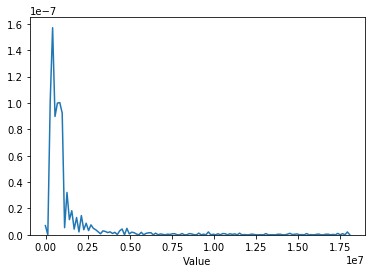

In [50]:
_ = sns.distplot(df_useful["GDP"]["Value"], rug=False, hist=False)

As we later want to train some Machine Learning models, we log those values so that their distribution look a bit **more like a normal distribution**.

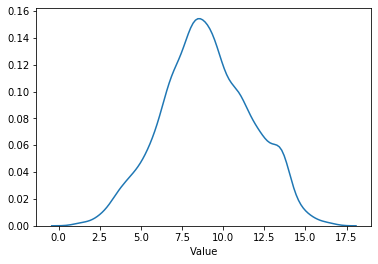

In [51]:
#looks better with log scale
_ = sns.distplot(np.log(df_useful["GDP"]["Value"]), rug=False, hist=False)

The new distribution indeed looks better to train models on it.

### 1.F. Making one uniformized dataframe  <a name="1F"></a>

In this part, we will make one **uniformized dataframe** `uni_df` with the following columns.


    Country | Year | GDP | Crops production columns | Livestock production columns | Crops importation columns | Livestock importation columns | Crops exportation columns | Livestock exportation columns | CPI
    
In this uniformized dataframe, **a tuple `(Country, Year)` uniquely identifies a row**.


#### 1.F.a. Pivoting dataframes with items  <a name="1Fa"></a>

The current dataframes have several rows for a given `(Country, Year)`. Each of this row correspond to one item. We would like to have a unique row for a given `(Country, Year)` and one column per item:

In [52]:
need_pivot = ['Crops Production',
              'Livestock production',
              'Live animals import quantities',
              'Live animals export quantities',
              'Food import quantities',
              'Food export quantities']

def rename_columns(x, word):
    if x not in ['Area', 'Year', 'ha', 'tonnes', 'hg/ha', 'Head', '1000 Head']:
        return x + ' ' + word
    return x

df_useful['GDP'] = df_useful['GDP'].rename(columns = {'Value':'(GDP, million $)'})[["Area",'Year','(GDP, million $)']]
df_useful['Consumer price indices'] = df_useful['Consumer price indices'].rename(columns = {'Value':'(Consumer price indices, %)'})[["Area",'Year','(Consumer price indices, %)']]

for df_name in need_pivot :
    df_useful[df_name] = pd.pivot_table(df_useful[df_name], index=["Area",'Year'], columns=["Item","Unit"], values="Value").rename(columns=lambda x: rename_columns(x, df_name))
    display(df_name, df_useful[df_name].sample(5))

'Crops Production'

Item                Anise, badian, fennel, coriander Crops Production  \
Unit                                                           tonnes   
Area           Year                                                     
Mauritius      1978                                               NaN   
Bahamas        1975                                               NaN   
Gabon          2009                                               NaN   
American Samoa 1984                                               NaN   
Turkmenistan   1962                                               NaN   

Item                Apples Crops Production Apricots Crops Production  \
Unit                                 tonnes                    tonnes   
Area           Year                                                     
Mauritius      1978                     NaN                       NaN   
Bahamas        1975                     NaN                       NaN   
Gabon          2009                     NaN                       NaN   
American Samoa 1984                     NaN                       NaN   
Turkmenistan   1962               1865000.0                  120000.0   

Item                Areca nuts Crops Production Artichokes Crops Production  \
Unit                                     tonnes                      tonnes   
Area           Year                                                           
Mauritius      1978                         NaN                         NaN   
Bahamas        1975                         NaN                         NaN   
Gabon          2009                         NaN                         NaN   
American Samoa 1984                         NaN                         NaN   
Turkmenistan   1962                         NaN                         NaN   

Item                Asparagus Crops Production Avocados Crops Production  \
Unit                                    tonnes                    tonnes   
Area           Year                                                        
Mauritius      1978                        NaN                       NaN   
Bahamas        1975                        NaN                       NaN   
Gabon          2009                        NaN                       NaN   
American Samoa 1984                        NaN                       NaN   
Turkmenistan   1962                        NaN                       NaN   

Item                Bambara beans Crops Production Bananas Crops Production  \
Unit                                        tonnes                   tonnes   
Area           Year                                                           
Mauritius      1978                            NaN                   7154.0   
Bahamas        1975                            NaN                   6400.0   
Gabon          2009                            NaN                  15000.0   
American Samoa 1984                            NaN                   1000.0   
Turkmenistan   1962                            NaN                      NaN   

Item                Barley Crops Production  ...  \
Unit                                 tonnes  ...   
Area           Year                          ...   
Mauritius      1978                     NaN  ...   
Bahamas        1975                     NaN  ...   
Gabon          2009                     NaN  ...   
American Samoa 1984                     NaN  ...   
Turkmenistan   1962              17985008.0  ...   

Item                Sweet potatoes Crops Production  \
Unit                                         tonnes   
Area           Year                                   
Mauritius      1978                           164.0   
Bahamas        1975                           280.0   
Gabon          2009                          3124.0   
American Samoa 1984                             NaN   
Turkmenistan   1962                             NaN   

Item                Tangerines, mandarins, clementines, satsumas Crops Production  \
Unit        

'Livestock production'

Item                Animals live nes Livestock production  \
Unit                                                 Head   
Area           Year                                         
Albania        1996                                   NaN   
Malaysia       1992                                   NaN   
Timor-Leste    1970                                   NaN   
American Samoa 1966                                   NaN   
Cuba           1999                                   NaN   

Item                Asses Livestock production Beehives Livestock production  \
Unit                                      Head       No Livestock production   
Area           Year                                                            
Albania        1996                   113000.0                       53900.0   
Malaysia       1992                        NaN                           NaN   
Timor-Leste    1970                   581000.0                     4766000.0   
American Samoa 1966                        NaN                           NaN   
Cuba           1999                     6400.0                      143200.0   

Item                Buffaloes Livestock production  \
Unit                                          Head   
Area           Year                                  
Albania        1996                          120.0   
Malaysia       1992                       193800.0   
Timor-Leste    1970                       292477.5   
American Samoa 1966                            NaN   
Cuba           1999                            NaN   

Item                Camelids, other Livestock production  \
Unit                                                Head   
Area           Year                                        
Albania        1996                                  NaN   
Malaysia       1992                                  NaN   
Timor-Leste    1970                                  NaN   
American Samoa 1966                                  NaN   
Cuba           1999                                  NaN   

Item                Camels Livestock production Cattle Livestock production  \
Unit                                       Head                        Head   
Area           Year                                                           
Albania        1996                         NaN                    806000.0   
Malaysia       1992                         NaN                    718123.0   
Timor-Leste    1970                    244000.0                  47614517.5   
American Samoa 1966                         NaN                       230.0   
Cuba           1999                         NaN                   4405800.0   

Item                Cattle and Buffaloes Livestock production  \
Unit                                                     Head   
Area           Year                                             
Albania        1996                                  806120.0   
Malaysia       1992                                  911923.0   
Timor-Leste    1970                                47906995.0   
American Samoa 1966                                     230.0   
Cuba           1999                                 4405800.0   

Item                Chickens Livestock production Ducks Livestock production  \
Unit                                    1000 Head                  1000 Head   
Area           Year                                                            
Albania        1996                        2888.0                      365.0   
Malaysia       1992                       83770.0                    15000.0   
Timor-Leste    1970                      286306.0                        NaN   
American Samoa 1966                          70.0                        NaN   
Cuba           1999                       28306.0                        NaN   

Item                 ... Horses Livestock production  \
Unit                 ...                        Head   
Area           Year  ...                         

'Live animals import quantities'

Item             Animals live nes Live animals import quantities  \
Unit                                                        Head   
Area        Year                                                   
Kuwait      1975                                             NaN   
Argentina   1972                                             0.0   
Switzerland 2009                                             NaN   
Brazil      1969                                             0.0   
Russia      1995                                             NaN   

Item             Asses Live animals import quantities  \
Unit                                             Head   
Area        Year                                        
Kuwait      1975                                  NaN   
Argentina   1972                                  NaN   
Switzerland 2009                                  0.0   
Brazil      1969                                  0.0   
Russia      1995                                  NaN   

Item             Beehives Live animals import quantities  \
Unit                   No Live animals import quantities   
Area        Year                                           
Kuwait      1975                                     NaN   
Argentina   1972                                     0.0   
Switzerland 2009                                     0.0   
Brazil      1969                                     NaN   
Russia      1995                                     NaN   

Item             Bovine, Animals Live animals import quantities  \
Unit                                                       Head   
Area        Year                                                  
Kuwait      1975                                        12639.0   
Argentina   1972                                         2598.0   
Switzerland 2009                                         4006.0   
Brazil      1969                                        17399.0   
Russia      1995                                        60000.0   

Item             Buffaloes Live animals import quantities  \
Unit                                                 Head   
Area        Year                                            
Kuwait      1975                                      NaN   
Argentina   1972                                      0.0   
Switzerland 2009                                      NaN   
Brazil      1969                                      NaN   
Russia      1995                                      NaN   

Item             Camelids, other Live animals import quantities  \
Unit                                                       Head   
Area        Year                                                  
Kuwait      1975                                            NaN   
Argentina   1972                                            NaN   
Switzerland 2009                                            NaN   
Brazil      1969                                            NaN   
Russia      1995                                            NaN   

Item             Camels Live animals import quantities  \
Unit                                              Head   
Area        Year                                         
Kuwait      1975                                   0.0   
Argentina   1972                                   NaN   
Switzerland 2009                                   NaN   
Brazil      1969                                   NaN   
Russia      1995                                   NaN   

Item             Cattle Live animals import quantities  \
Unit                                              Head   
Area        Year                                         
Kuwait      1975                               12639.0   
Argentina   1972                                2598.0   
Switzerland 2009                                4006.0   
Brazil      1969                               17399.0   
Russia      1995                               60000.0   

Item             Chicken

'Live animals export quantities'

Item                     Animals live nes Live animals export quantities  \
Unit                                                                Head   
Area                Year                                                   
Iraq                1987                                             NaN   
Iceland             1979                                             NaN   
Nepal               1984                                             NaN   
Trinidad and Tobago 1997                                             0.0   
Peru                1984                                             NaN   

Item                     Asses Live animals export quantities  \
Unit                                                     Head   
Area                Year                                        
Iraq                1987                                  NaN   
Iceland             1979                                  NaN   
Nepal               1984                                  NaN   
Trinidad and Tobago 1997                                  NaN   
Peru                1984                                  NaN   

Item                     Beehives Live animals export quantities  \
Unit                           No Live animals export quantities   
Area                Year                                           
Iraq                1987                                     NaN   
Iceland             1979                                     NaN   
Nepal               1984                                     NaN   
Trinidad and Tobago 1997                                     NaN   
Peru                1984                                     NaN   

Item                     Bovine, Animals Live animals export quantities  \
Unit                                                               Head   
Area                Year                                                  
Iraq                1987                                            0.0   
Iceland             1979                                            NaN   
Nepal               1984                                        19000.0   
Trinidad and Tobago 1997                                            2.0   
Peru                1984                                            0.0   

Item                     Buffaloes Live animals export quantities  \
Unit                                                         Head   
Area                Year                                            
Iraq                1987                                      NaN   
Iceland             1979                                      NaN   
Nepal               1984                                  15000.0   
Trinidad and Tobago 1997                                      NaN   
Peru                1984                                      NaN   

Item                     Camelids, other Live animals export quantities  \
Unit                                                               Head   
Area                Year                                                  
Iraq                1987                                            NaN   
Iceland             1979                                            NaN   
Nepal               1984                                            NaN   
Trinidad and Tobago 1997                                            NaN   
Peru                1984                                            NaN   

Item                     Camels Live animals export quantities  \
Unit                                                      Head   
Area                Year                                         
Iraq                1987                                   NaN   
Iceland             1979                                   NaN   
Nepal               1984                                   NaN   
Trinidad and Tobago 1997                                   NaN   
Peru                1984                                   NaN   

Item                     Cattle Live anim

'Food import quantities'

Item                      Alfalfa meal and pellets Food import quantities  \
Unit                                                               tonnes   
Area                 Year                                                   
Bermuda              1981                                             NaN   
Tunisia              1981                                             0.0   
United Arab Emirates 1989                                             NaN   
Sierra Leone         2001                                             NaN   
Lebanon              1991                                             NaN   

Item                      Almonds shelled Food import quantities  \
Unit                                                      tonnes   
Area                 Year                                          
Bermuda              1981                                    NaN   
Tunisia              1981                                  488.0   
United Arab Emirates 1989                                 4055.0   
Sierra Leone         2001                                    NaN   
Lebanon              1991                                  600.0   

Item                      Animal Oil+Fat+Grs Food import quantities  \
Unit                                                         tonnes   
Area                 Year                                             
Bermuda              1981                                       NaN   
Tunisia              1981                                      55.0   
United Arab Emirates 1989                                     443.0   
Sierra Leone         2001                                       0.0   
Lebanon              1991                                     900.0   

Item                      Animal Vegetable Oil Food import quantities  \
Unit                                                           tonnes   
Area                 Year                                               
Bermuda              1981                                       285.0   
Tunisia              1981                                     83543.0   
United Arab Emirates 1989                                     87867.0   
Sierra Leone         2001                                      9166.0   
Lebanon              1991                                     66181.0   

Item                      Animal fats Food import quantities  \
Unit                                                  tonnes   
Area                 Year                                      
Bermuda              1981                                NaN   
Tunisia              1981                               55.0   
United Arab Emirates 1989                              443.0   
Sierra Leone         2001                                0.0   
Lebanon              1991                              900.0   

Item                      Anise, badian, fennel, coriander Food import quantities  \
Unit                                                                       tonnes   
Area                 Year                                                           
Bermuda              1981                                                NaN        
Tunisia              1981                                               60.0        
United Arab Emirates 1989                                                0.0        
Sierra Leone         2001                                                NaN        
Lebanon              1991                                              269.0        

Item                      Apples Food import quantities  \
Unit                                             tonnes   
Area                 Year                                 
Bermuda              1981                         692.0   
Tunisia              1981                           0.0   
United Arab Emirates 1989                       58755.0   
Sierra Leone         2001                           NaN   
Lebanon              1991                         750.0   

Item             

'Food export quantities'

Item                                 Alfalfa meal and pellets Food export quantities  \
Unit                                                                          tonnes   
Area                            Year                                                   
Vietnam                         2002                                             NaN   
New Zealand                     1978                                             0.0   
Costa Rica                      2002                                             NaN   
Pacific Islands Trust Territory 1975                                             NaN   
Mexico                          1979                                             0.0   

Item                                 Almonds shelled Food export quantities  \
Unit                                                                 tonnes   
Area                            Year                                          
Vietnam                         2002                                    NaN   
New Zealand                     1978                                    0.0   
Costa Rica                      2002                                    2.0   
Pacific Islands Trust Territory 1975                                    NaN   
Mexico                          1979                                    0.0   

Item                                 Animal Oil+Fat+Grs Food export quantities  \
Unit                                                                    tonnes   
Area                            Year                                             
Vietnam                         2002                                       NaN   
New Zealand                     1978                                   98587.0   
Costa Rica                      2002                                      50.0   
Pacific Islands Trust Territory 1975                                       NaN   
Mexico                          1979                                     387.0   

Item                                 Animal Vegetable Oil Food export quantities  \
Unit                                                                      tonnes   
Area                            Year                                               
Vietnam                         2002                                     19062.0   
New Zealand                     1978                                     98695.0   
Costa Rica                      2002                                     78997.0   
Pacific Islands Trust Territory 1975                                      1000.0   
Mexico                          1979                                      1647.0   

Item                                 Animal fats Food export quantities  \
Unit                                                             tonnes   
Area                            Year                                      
Vietnam                         2002                                NaN   
New Zealand                     1978                            98587.0   
Costa Rica                      2002                               50.0   
Pacific Islands Trust Territory 1975                                NaN   
Mexico                          1979                              387.0   

Item                                 Anise, badian, fennel, coriander Food export quantities  \
Unit                                                                                  tonnes   
Area                            Year                                                           
Vietnam                         2002                                             2531.0        
New Zealand                     1978                                                0.0        
Costa Rica                      2002                                               30.0        
Pacific Islands Trust Territory 1975                                                NaN        
Mexico                          1979                       

Some **Nan values** have appeared. After some analysis, we have conclude to replace those Nan values by zeros. Indeed, it seems that those Nan values means that the value were very low and not significant to be measured.

In [53]:
# Deal with the NaN that appeared
for df_name in df_useful :
    if df_name != "GDP":
        for column in list(df_useful[df_name]):
            if column not in ['Area', 'Year']:
                df_useful[df_name][column].fillna(0, inplace=True)

In [54]:
#removing the multiindex, so that merge is clean with GDP and CPI
for df_name in need_pivot :
    df_useful[df_name].columns = [' '.join([str(_) for _ in v]) for v in df_useful[df_name].columns.values]
    display(df_useful[df_name].sample(5))
    

Anise, badian, fennel, coriander Crops Production tonnes  \
Area                      Year                                                             
Paraguay                  2009                                                0.0          
Wallis and Futuna Islands 2001                                                0.0          
Colombia                  1975                                                0.0          
Niue                      1991                                                0.0          
Sao Tome and Principe     1962                                                0.0          

                                Apples Crops Production tonnes  \
Area                      Year                                   
Paraguay                  2009                           685.0   
Wallis and Futuna Islands 2001                             0.0   
Colombia                  1975                             0.0   
Niue                      1991                             0.0   
Sao Tome and Principe     1962                             0.0   

                                Apricots Crops Production tonnes  \
Area                      Year                                     
Paraguay                  2009                               0.0   
Wallis and Futuna Islands 2001                               0.0   
Colombia                  1975                               0.0   
Niue                      1991                               0.0   
Sao Tome and Principe     1962                               0.0   

                                Areca nuts Crops Production tonnes  \
Area                      Year                                       
Paraguay                  2009                                 0.0   
Wallis and Futuna Islands 2001                                 0.0   
Colombia                  1975                                 0.0   
Niue                      1991                                 0.0   
Sao Tome and Principe     1962                                 0.0   

                                Artichokes Crops Production tonnes  \
Area                      Year                                       
Paraguay                  2009                                 0.0   
Wallis and Futuna Islands 2001                                 0.0   
Colombia                  1975                                 0.0   
Niue                      1991                                 0.0   
Sao Tome and Principe     1962                                 0.0   

                                Asparagus Crops Production tonnes  \
Area                      Year                                      
Paraguay                  2009                                0.0   
Wallis and Futuna Islands 2001                                0.0   
Colombia                  1975                                0.0   
Niue                      1991                                0.0   
Sao Tome and Principe     1962                                0.0   

                                Avocados Crops Production tonnes  \
Area                      Year                                     
Paraguay                  2009                           14000.0   
Wallis and Futuna Islands 2001                               0.0   
Colombia                  1975                           13298.0   
Niue                      1991                               0.0   
Sao Tome and Principe     1962                               0.0   

                                Bambara beans Crops Production tonnes  \
Area                      Year                                          
Paraguay                  2009                                    0.0   
Wallis and Futuna Islands 2001                                    0.0   
Colombia                  1975                                    0.0   
Niue                      1991                                    0.0   
Sao Tome and Principe     1962                                    

Animals live nes Livestock production Head  \
Area       Year                                               
Niger      1994                                         0.0   
Poland     1986                                         0.0   
Mauritania 2010                                         0.0   
Greece     1976                                         0.0   
Costa Rica 1983                                         0.0   

                 Asses Livestock production Head  \
Area       Year                                    
Niger      1994                        1187960.0   
Poland     1986                              0.0   
Mauritania 2010                         170000.0   
Greece     1976                         289714.0   
Costa Rica 1983                           6500.0   

                 Beehives Livestock production No Livestock production  \
Area       Year                                                          
Niger      1994                                                0.0       
Poland     1986                                          2200000.0       
Mauritania 2010                                                0.0       
Greece     1976                                          1035000.0       
Costa Rica 1983                                            50000.0       

                 Buffaloes Livestock production Head  \
Area       Year                                        
Niger      1994                                  0.0   
Poland     1986                                  0.0   
Mauritania 2010                                  0.0   
Greece     1976                               5022.0   
Costa Rica 1983                                  0.0   

                 Camelids, other Livestock production Head  \
Area       Year                                              
Niger      1994                                        0.0   
Poland     1986                                        0.0   
Mauritania 2010                                        0.0   
Greece     1976                                        0.0   
Costa Rica 1983                                        0.0   

                 Camels Livestock production Head  \
Area       Year                                     
Niger      1994                         1358080.0   
Poland     1986                               0.0   
Mauritania 2010                         1360306.0   
Greece     1976                               0.0   
Costa Rica 1983                               0.0   

                 Cattle Livestock production Head  \
Area       Year                                     
Niger      1994                         3864560.0   
Poland     1986                        10919043.0   
Mauritania 2010                         1701112.0   
Greece     1976                         1184155.0   
Costa Rica 1983                         2364800.0   

                 Cattle and Buffaloes Livestock production Head  \
Area       Year                                                   
Niger      1994                                       3864560.0   
Poland     1986                                      10919043.0   
Mauritania 2010                                       1701112.0   
Greece     1976                                       1189177.0   
Costa Rica 1983                                       2364800.0   

                 Chickens Livestock production 1000 Head  \
Area       Year                                            
Niger      1994                                  10581.0   
Poland     1986                                  66152.0   
Mauritania 2010                                   4300.0   
Greece     1976                                  28843.0   
Costa Rica 1983                                   7000.0   

                 Ducks Livestock production 1000 Head  ...  \
Area       Year                                        ...   
Niger      1994                                   0.0  ...   
Poland     1986                           

Animals live nes Live animals import quantities Head  \
Area                   Year                                                         
Ecuador                2007                                                0.0      
Romania                1965                                                0.0      
British Virgin Islands 1992                                                0.0      
Trinidad and Tobago    1966                                                0.0      
Sierra Leone           2011                                                0.0      

                             Asses Live animals import quantities Head  \
Area                   Year                                              
Ecuador                2007                                        0.0   
Romania                1965                                        0.0   
British Virgin Islands 1992                                        0.0   
Trinidad and Tobago    1966                                        0.0   
Sierra Leone           2011                                        0.0   

                             Beehives Live animals import quantities No Live animals import quantities  \
Area                   Year                                                                              
Ecuador                2007                                                0.0                           
Romania                1965                                                0.0                           
British Virgin Islands 1992                                                0.0                           
Trinidad and Tobago    1966                                                0.0                           
Sierra Leone           2011                                                0.0                           

                             Bovine, Animals Live animals import quantities Head  \
Area                   Year                                                        
Ecuador                2007                                               11.0     
Romania                1965                                               19.0     
British Virgin Islands 1992                                                0.0     
Trinidad and Tobago    1966                                              550.0     
Sierra Leone           2011                                            50000.0     

                             Buffaloes Live animals import quantities Head  \
Area                   Year                                                  
Ecuador                2007                                            0.0   
Romania                1965                                            0.0   
British Virgin Islands 1992                                            0.0   
Trinidad and Tobago    1966                                            0.0   
Sierra Leone           2011                                            0.0   

                             Camelids, other Live animals import quantities Head  \
Area                   Year                                                        
Ecuador                2007                                                0.0     
Romania                1965                                                0.0     
British Virgin Islands 1992                                                0.0     
Trinidad and Tobago    1966                                                0.0     
Sierra Leone           2011                                                0.0     

                             Camels Live animals import quantities Head  \
Area                   Year                                               
Ecuador                2007                                         0.0   
Romania                1965                                         0.0   
British Virgin Islands 1992                                         0.0   
Trinidad and Tobago    1966                                         0.0

Animals live nes Live animals export quantities Head  \
Area                  Year                                                         
Dominican Republic    2001                                                0.0      
Guatemala             2006                                                0.0      
Laos                  1972                                                0.0      
Georgia               1965                                                0.0      
Saint Kitts and Nevis 1961                                                0.0      

                            Asses Live animals export quantities Head  \
Area                  Year                                              
Dominican Republic    2001                                        0.0   
Guatemala             2006                                        0.0   
Laos                  1972                                        0.0   
Georgia               1965                                        0.0   
Saint Kitts and Nevis 1961                                        0.0   

                            Beehives Live animals export quantities No Live animals export quantities  \
Area                  Year                                                                              
Dominican Republic    2001                                                0.0                           
Guatemala             2006                                                0.0                           
Laos                  1972                                                0.0                           
Georgia               1965                                                0.0                           
Saint Kitts and Nevis 1961                                                0.0                           

                            Bovine, Animals Live animals export quantities Head  \
Area                  Year                                                        
Dominican Republic    2001                                                0.0     
Guatemala             2006                                              580.0     
Laos                  1972                                                0.0     
Georgia               1965                                                0.0     
Saint Kitts and Nevis 1961                                              100.0     

                            Buffaloes Live animals export quantities Head  \
Area                  Year                                                  
Dominican Republic    2001                                            0.0   
Guatemala             2006                                            0.0   
Laos                  1972                                            0.0   
Georgia               1965                                            0.0   
Saint Kitts and Nevis 1961                                            0.0   

                            Camelids, other Live animals export quantities Head  \
Area                  Year                                                        
Dominican Republic    2001                                                0.0     
Guatemala             2006                                                0.0     
Laos                  1972                                                0.0     
Georgia               1965                                                0.0     
Saint Kitts and Nevis 1961                                                0.0     

                            Camels Live animals export quantities Head  \
Area                  Year                                               
Dominican Republic    2001                                         0.0   
Guatemala             2006                                         0.0   
Laos                  1972                                         0.0   
Georgia               1965                                         0.0   
Saint Kitts and Nevis 1961                 

Alfalfa meal and pellets Food import quantities tonnes  \
Area     Year                                                           
Grenada  2002                                               15.0        
Estonia  1975                                                0.0        
Canada   1997                                               88.0        
Dominica 1965                                                0.0        
Tunisia  1996                                                0.0        

               Almonds shelled Food import quantities tonnes  \
Area     Year                                                  
Grenada  2002                                            1.0   
Estonia  1975                                         3951.0   
Canada   1997                                         6954.0   
Dominica 1965                                            0.0   
Tunisia  1996                                          122.0   

               Animal Oil+Fat+Grs Food import quantities tonnes  \
Area     Year                                                     
Grenada  2002                                               5.0   
Estonia  1975                                               0.0   
Canada   1997                                           45615.0   
Dominica 1965                                              95.0   
Tunisia  1996                                             866.0   

               Animal Vegetable Oil Food import quantities tonnes  \
Area     Year                                                       
Grenada  2002                                              698.0    
Estonia  1975                                            98730.0    
Canada   1997                                           378550.0    
Dominica 1965                                               95.0    
Tunisia  1996                                           217301.0    

               Animal fats Food import quantities tonnes  \
Area     Year                                              
Grenada  2002                                        5.0   
Estonia  1975                                        0.0   
Canada   1997                                    45615.0   
Dominica 1965                                       95.0   
Tunisia  1996                                      866.0   

               Anise, badian, fennel, coriander Food import quantities tonnes  \
Area     Year                                                                   
Grenada  2002                                                5.0                
Estonia  1975                                                0.0                
Canada   1997                                             1100.0                
Dominica 1965                                                0.0                
Tunisia  1996                                             1924.0                

               Apples Food import quantities tonnes  \
Area     Year                                         
Grenada  2002                                  56.0   
Estonia  1975                              340829.0   
Canada   1997                              113710.0   
Dominica 1965                                  20.0   
Tunisia  1996                                   0.0   

               Apricots Food import quantities tonnes  \
Area     Year                                           
Grenada  2002                                     0.0   
Estonia  1975                                     0.0   
Canada   1997                                  4647.0   
Dominica 1965                                     0.0   
Tunisia  1996                                    40.0   

               Apricots, dry Food import quantities tonnes  \
Area     Year                                                
Grenada  2002                                          0.0   
Estonia  1975                                          0.0   
Canada   1997                                       1623.0   
Dominica 1965  

Alfalfa meal and pellets Food export quantities tonnes  \
Area                      Year                                                           
Sweden                    1961                                                0.0        
China, Taiwan Province of 1977                                                0.0        
Uzbekistan                1998                                                0.0        
Ghana                     2003                                                0.0        
Seychelles                2013                                                0.0        

                                Almonds shelled Food export quantities tonnes  \
Area                      Year                                                  
Sweden                    1961                                            0.0   
China, Taiwan Province of 1977                                            0.0   
Uzbekistan                1998                                            0.0   
Ghana                     2003                                            0.0   
Seychelles                2013                                            0.0   

                                Animal Oil+Fat+Grs Food export quantities tonnes  \
Area                      Year                                                     
Sweden                    1961                                            8177.0   
China, Taiwan Province of 1977                                               0.0   
Uzbekistan                1998                                               0.0   
Ghana                     2003                                               0.0   
Seychelles                2013                                               0.0   

                                Animal Vegetable Oil Food export quantities tonnes  \
Area                      Year                                                       
Sweden                    1961                                            40751.0    
China, Taiwan Province of 1977                                                0.0    
Uzbekistan                1998                                            19000.0    
Ghana                     2003                                            66768.0    
Seychelles                2013                                              672.0    

                                Animal fats Food export quantities tonnes  \
Area                      Year                                              
Sweden                    1961                                     8177.0   
China, Taiwan Province of 1977                                        0.0   
Uzbekistan                1998                                        0.0   
Ghana                     2003                                        0.0   
Seychelles                2013                                        0.0   

                                Anise, badian, fennel, coriander Food export quantities tonnes  \
Area                      Year                                                                   
Sweden                    1961                                                1.0                
China, Taiwan Province of 1977                                                0.0                
Uzbekistan                1998                                                0.0                
Ghana                     2003                                               41.0                
Seychelles                2013                                                0.0                

                                Apples Food export quantities tonnes  \
Area                      Year                                         
Sweden                    1961                                 900.0   
China, Taiwan Province of 1977                                   0.0   
Uzbekistan                1998                                1600.0   
Ghana                     2003                        

#### 1.F.b. Dealing with unit discrepencies  <a name="1Fb"></a>
Before merging dataframes, we notice two different units in the dataframes dealing with livestock datas: "1000 Heads" and "Heads". Let's have a look at the following dataframes:
* Livestock production
* Live animals import quantities
* Live animals export quantities


In [55]:
#Select dfs that correspond to livestock data
livestock_dfs={s:df_useful[s] for s in df_useful.keys() if 'live' in s.lower()}

Before handling the data, we want to know if the columns presented in "1000 Heads" are also presented in "Heads"

In [56]:
# Useful method to remove words from string
def drop_words( s , w=1 , end=True):
    if end:
        return s.rsplit(' ',w)[0]
    else:
        return s.split(' ',w)[-1]
    

for key in livestock_dfs.keys():
    col=livestock_dfs[key].columns
    th_heads=[s for s in col if '1000 head' in s.lower()]
    heads=[s for s in col if '1000 head' not in s.lower()]
    shared=[s for s in th_heads if drop_words(s,2)+" Head" in heads]
    print('There are {} columns expressed in "1000 Heads" and {} columns expressed in "Head" in the dataframe {} and {} columns are expressed in both'
          .format(len(th_heads),len(heads),key,len(shared)))
    

There are 8 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Livestock production and 0 columns are expressed in both
There are 6 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Live animals import quantities and 0 columns are expressed in both
There are 6 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Live animals export quantities and 0 columns are expressed in both


In [57]:
def convert_1000H_to_head(df):
    
    # methods converting the columns expressed in "1000 Head" in "Head" and renaming them
    
    cols_to_convert=[col for col in df.columns if '1000 head' in col.lower()]
    df[cols_to_convert]=df[cols_to_convert]*1000
    new_cols=[drop_words(s,2)+' Head' for s in cols_to_convert]
    name_dic={old:new for old,new in zip(cols_to_convert,new_cols)}
    df=df.rename(columns=name_dic)
    return df

In [58]:
for key in livestock_dfs.keys():
    df_useful[key]=convert_1000H_to_head(df_useful[key])
    display(df_useful[key].head(1))

Animals live nes Livestock production Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Asses Livestock production Head  \
Area        Year                                    
Afghanistan 1961                        1300000.0   

                  Beehives Livestock production No Livestock production  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Buffaloes Livestock production Head  \
Area        Year                                        
Afghanistan 1961                                  0.0   

                  Camelids, other Livestock production Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Camels Livestock production Head  \
Area        Year                                     
Afghanistan 1961                          250000.0   

                  Cattle Livestock production Head  \
Area        Year                                     
Afghanistan 1961                         2900000.0   

                  Cattle and Buffaloes Livestock production Head  \
Area        Year                                                   
Afghanistan 1961                                       2900000.0   

                  Chickens Livestock production Head  \
Area        Year                                       
Afghanistan 1961                           4700000.0   

                  Ducks Livestock production Head  ...  \
Area        Year                                   ...   
Afghanistan 1961                              0.0  ...   

                  Horses Livestock production Head  \
Area        Year                                     
Afghanistan 1961                          276841.0   

                  Mules Livestock production Head  \
Area        Year                                    
Afghanistan 1961                          20000.0   

                  Pigeons, other birds Livestock production Head  \
Area        Year                                                   
Afghanistan 1961                                             0.0   

                  Pigs Livestock production Head  \
Area        Year                                   
Afghanistan 1961                             0.0   

                  Poultry Birds Livestock production Head  \
Area        Year                                            
Afghanistan 1961                                4700000.0   

                  Rabbits and hares Livestock production Head  \
Area        Year                                                
Afghanistan 1961                                          0.0   

                  Rodents, other Livestock production Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Sheep Livestock production Head  \
Area        Year                                    
Afghanistan 1961                       18000000.0   

                  Sheep and Goats Livestock production Head  \
Area        Year                                              
Afghanistan 1961                                 22200000.0   

                  Turkeys Livestock production Head  
Area        Year                                     
Afghanistan 1961                                0.0  

[1 rows x 22 columns]

Animals live nes Live animals import quantities Head  \
Area        Year                                                         
Afghanistan 1961                                                0.0      

                  Asses Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Beehives Live animals import quantities No Live animals import quantities  \
Area        Year                                                                              
Afghanistan 1961                                                0.0                           

                  Bovine, Animals Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Buffaloes Live animals import quantities Head  \
Area        Year                                                  
Afghanistan 1961                                            0.0   

                  Camelids, other Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Camels Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Cattle Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Chickens Live animals import quantities Head  \
Area        Year                                                 
Afghanistan 1961                                           0.0   

                  Ducks Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Goats Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Horses Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Mules Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Pigeons, other birds Live animals import quantities Head  \
Area        Year                                                             
Afghanistan 1961                                                0.0          

                  Pigs Live animals import quantities Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Rabbits and hares Live animals import quantities Head  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Rodents, other Live animals import quantities Head  \
Area        Year                                                       
Afghanistan 1961                                                0.0    

                  Sheep Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Sheep and Goats Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Turkeys Live animals import quantiti

Animals live nes Live animals export quantities Head  \
Area        Year                                                         
Afghanistan 1961                                                0.0      

                  Asses Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Beehives Live animals export quantities No Live animals export quantities  \
Area        Year                                                                              
Afghanistan 1961                                                0.0                           

                  Bovine, Animals Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Buffaloes Live animals export quantities Head  \
Area        Year                                                  
Afghanistan 1961                                            0.0   

                  Camelids, other Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Camels Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Cattle Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Chickens Live animals export quantities Head  \
Area        Year                                                 
Afghanistan 1961                                           0.0   

                  Ducks Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Goats Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Horses Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Mules Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Pigeons, other birds Live animals export quantities Head  \
Area        Year                                                             
Afghanistan 1961                                                0.0          

                  Pigs Live animals export quantities Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Rabbits and hares Live animals export quantities Head  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Rodents, other Live animals export quantities Head  \
Area        Year                                                       
Afghanistan 1961                                                0.0    

                  Sheep Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Sheep and Goats Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Turkeys Live animals export quantiti

#### 1.F.c. Merging everything  <a name="1Fc"></a>
We are now creating the uniformized dataframe `uni_df`. Each row corresponds to one tuple `(Country, Year)` so that we can later **group by country** or **year**. In addition to the country ("Area") and the "Year", the columns will either be an **economic feature ("GDP", "CPI")** or an **agricultural one (some crop harvested area, some livestock export quantity, ...)**. With this uniformized dataframe, we can later on **analyze correlations and links** between different feautures place and yearwise. This means we can measure a correlation of e.g. GDP with the production of a specific crop over all countries and all years.

In [59]:
uni_df = df_useful['GDP'].dropna()
for df_name in need_pivot :
    uni_df = pd.merge(uni_df, df_useful[df_name], how='left', on=['Area', 'Year'])
uni_df = pd.merge(uni_df,df_useful['Consumer price indices'], how='left', on=['Area', 'Year'])

# Deal with the NaN that appeared
for column in list(uni_df):
    if column not in ['Area', 'Year']:
        uni_df[column].fillna(0, inplace=True)
uni_df.sample(30)

Area  Year  (GDP, million $)  \
8703                            Uganda  1981      3.687893e+03   
1926                          Colombia  1993      7.221265e+04   
9209                            Russia  1982      9.599478e+05   
3734                          Honduras  1979      2.686009e+03   
4073                           Ireland  1996      7.586285e+04   
8305                         Macedonia  2003      4.946297e+03   
1347                           Burundi  1971      2.519287e+02   
8864       United Republic of Tanzania  1978      7.583729e+03   
8637          Turks and Caicos Islands  2007      7.734897e+02   
1371                           Burundi  1995      1.000430e+03   
9042                      Turkmenistan  1972      5.157975e+05   
470                          Australia  2000      4.088649e+05   
9083                           Georgia  1975      6.859716e+05   
2347                    Czech Republic  1971      1.703857e+04   
2368                          Slovakia  1981      5.077770e+04   
9316                        Uzbekistan  1988      7.798512e+05   
6041                     New Caledonia  2013      9.858014e+03   
4597                            Latvia  2011      2.842065e+04   
3948                         Indonesia  2009      5.745051e+05   
7143                       Saint Lucia  2005      9.354630e+02   
432                              Aruba  2008      2.745251e+03   
5868                       Netherlands  1988      2.585578e+05   
2988                              Fiji  1995      1.993418e+03   
9118                        Kazakhstan  1977      7.384165e+05   
6544                  Papua New Guinea  2010      1.420479e+04   
7196  Saint Vincent and the Grenadines  2012      6.929333e+02   
1932                          Colombia  1999      1.028981e+05   
4379                             Kenya  2000      1.446479e+04   
4955                            Malawi  1975      1.107998e+03   
4256                             Japan  1995      5.449118e+06   

      Anise, badian, fennel, coriander Crops Production tonnes  \
8703                                                0.0          
1926                                                0.0          
9209                                                0.0          
3734                                                0.0          
4073                                                0.0          
8305                                              500.0          
1347                                                0.0          
8864                                                0.0          
8637                                                0.0          
1371                                                0.0          
9042                                                0.0          
470                                               598.0          
9083                                                0.0          
2347                                                0.0          
2368                                                0.0          
9316                                                0.0          
6041                                                0.0          
4597                                                0.0          
3948                                                0.0          
7143                                                0.0          
432                                                 0.0          
5868                                             2279.0          
2988                                                0.0          
9118                                                0.0          
6544                                                0.0          
7196                                                0.0          
1932                                                0.0          
4379                                               90.0          
4955                                                0.0          
4256   

#### 1.G The last filter  <a name="1G"></a>

At the very beginning, when importing data for the crops production, we focused on the "food crops". It is very likely that the import and export dataframes contain more data than we have in the production dataframe. As we want, later, compare these data, we decide to keep only the crops and animals for which we have production,import and export data.  

Let's have a look!

In [60]:
import_cols=[col for col in uni_df.columns if 'import' in col.lower()]
export_cols=[col for col in uni_df.columns if 'export' in col.lower()]
prod_cols=[col for col in uni_df.columns if 'production' in col.lower()]
others=[col for col in uni_df.columns if 'production' not in col.lower() and 'export' not in col.lower() and 'import' not in col.lower()]
print('There are {} import columns, {} export columns,{} production columns and {} other.'.format(len(import_cols),len(export_cols),len(prod_cols),len(others)))

There are 472 import columns, 464 export columns,144 production columns and 4 other.


There is indeed much work to be done!

In [61]:
import_col_dic={drop_words(s,3):s for s in import_cols}
export_col_dic={drop_words(s,3):s for s in export_cols}
prod_col_dic={drop_words(s,3):s for s in prod_cols}

import_keys=list(import_col_dic.keys())
export_keys=list(export_col_dic.keys())
prod_keys=list(prod_col_dic.keys())

prod=set([])
imp=set([])
exp=set([])

for prod_feature in prod_keys:
    for imp_feature in import_keys:
        if prod_feature.lower()+" food" == imp_feature.lower() or prod_feature.lower()+" live animals" == imp_feature.lower():
            for exp_feature in export_keys:
                if prod_feature.lower()+" food" == exp_feature.lower() or prod_feature.lower()+" live animals" == exp_feature.lower():
                    prod.add(prod_feature)
                    imp.add(imp_feature)
                    exp.add(exp_feature)
prod=list(prod)
prod.sort()
exp=list(exp)
exp.sort()
imp=list(imp)
imp.sort()

print('We find {} columns present in import, export and production'.format(len(prod)))

import_cols=[import_col_dic[k] for k in imp]
export_cols=[export_col_dic[k] for k in exp]
prod_cols=[prod_col_dic[k] for k in prod]

cols_of_interest=others+import_cols+export_cols+prod_cols

We find 107 columns present in import, export and production


In [62]:
uni_df=uni_df[cols_of_interest]

In [63]:
import pickle
pickle.dump(uni_df,open("Scripts/Data/uni_df.pkl",'wb'))

### 2. Data exploration and first observations  <a name="2"></a>

2. 
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)      
                
    3. [Structure of international trade and historical context](#2C)       
        
    4. [Economic classification of countries](#2D)  
        
In this part, we will explore the dataset with more details. We will first see in more detail the [food productions, importations and exportations](#2A), next examine the [Consumer price indices](#2B), then study the [structure of international trade and historical context](#2C) and finally look at the [economic classification of countries](#2D).

#### 2.A. Food productions, importations and exportations <a name="2A"></a>

2. 
        
    1. 
    
        1. [Crops and livestock production and trade](#2Aa)  
    
        2. [Introducing the concept of food self-sufficiency](#2Ab)
    
            1. [Basic idea](#2Abi)
    
            2. [Formula and computation](#2Abii)

##### 2.A.a Crops and livestock production and trade <a name="2Aa"></a>
For the next milestone, we will also produce some maps, showing for instance the production of a specific crop per country over the years. We have shown in previous parts that the dataset contains the necessary data and that we can handle the data in its size and plot maps.

##### 2.A.b Introducing the concept of food self-sufficiency <a name="2Ab"></a>
In this section we will present and compute the **notion of food self-sufficiency**. We will use the **quantitative definition of the Food and Agriculture Organization (FAO)**. 
###### 2.A.b.i Basic idea <a name="2Abi"></a>
One may wonder how to know **whether a country produces all the food it needs or not**. The notion of food-self-sufficency allows to answer to this question. More formally, it is a rate that decribes how **to which degree a country can satisfy to meet its internal consumption needs by production**. It describes the extent to which a country is able to **feed its population through its domestic food production**. We are interested in this measure since we think**it could be correlated** with the economic conditions of this country, particularly **price stability**. Price stability is defined in the next part.
###### 2.A.b.ii Formula and computation <a name="2Abii"></a>
In order to compute the food self-sufficiency, we will apply the following **formula** that gives us the **food self-sudfficiency as a percentage** :

$$\frac{Production \times 100}{Production + Imports – Exports}$$

The following is a trial calculation of self-sufficiency. Refining which agriculutral products should go into this calculation still need to be done for next milestone. Indeed with our first calculations it seems that the self-sufficiency is always lower than 100% whereas this should not be the case.

In [64]:
def compute_self_suficiency(df,w=None, weighing=False):
    
    
    # From the unified dataframe df, compute the self sufficiency score for each year for each country
    # if a paramter of weights is given as a dict, the method returns the aggregated score.
    
    weights=w.copy()
    
    #Useful method to manipulate names
    def drop_words( s , w=1 , end=True):
        if end:
            return s.rsplit(' ',w)[0]
        else:
            return s.split(' ',w)[-1]
    
    df=df.set_index(['Area','Year'])
    
    #Getting the columns corresponding to import, export and production
    import_cols=[col for col in df.columns if 'import' in col.lower()]
    export_cols=[col for col in df.columns if 'export' in col.lower()]
    prod_cols=[col for col in df.columns if 'production' in col.lower()]
    
    #Initializing new dataframe
    scores=pd.DataFrame(index=df.index)
    
    #Generating scores
    for i,col in enumerate(import_cols):
        scores[drop_words(col,3)]=(df[prod_cols[i]]*100/(
                                    df[prod_cols[i]]+df[import_cols[i]]-df[export_cols[i]]))
    
    #If no weights, return scores without aggregate
    if weights==None:
        return scores
    
    features=[w for w in weights.keys()]
    temp=pd.DataFrame(index=df.index)
    
    #replacing na with 0 to avoid na aggregated scores
    scores=scores.fillna(0)
    
    #Selecting features of interest and multiplying them with their weight
    #Note: Some weights refer to the same score (eg 'Maize Crops Production tonnes' and 'Maize Food import quantities tonnes') to go around this problem, the scores referring to the same columns are sumed
    
    temp_dic={}#Will retain data untill complete and then turned into pandas DataFrame
    popped=[] #Will store the weights that are already taken care of because they reffered to the same columns as another weight already treated
    for feat in list(weights.keys()):
        if feat not in popped:
            w_agg={feat:weights[feat]}
            s=re.split(' Food| Live.*| Crops',feat)[0]
            s='^'+s
            w=weights[feat]

            for f in list(weights.keys()):
                if f!=feat and re.search(s,f) and s[1:]==re.split(' Food.*| Live.*| Crops.*',f)[0]:
                    w+=weights[f]
                    w_agg.update({f:weights[f]})
                    popped.append(f)
            cols=[c for c in scores.columns if re.split(' Food.*| Live.*| Crops.*',c)[0]==s[1:]]
            if len(cols)==0:
                print('\n {} NOT FOUND'.format(feat))
            else:
                #print('{} weight : {} agg from: {}'.format(feat,w,w_agg))
                temp_df=scores[cols].copy()
                if weighing:
                    temp_df=temp_df.apply(lambda x: x*w)
                else:
                    temp_df=temp_df.apply(lambda x: x*1/len(features))
                temp_dic.update(temp_df.to_dict())
            
    temp=pd.DataFrame(temp_dic)
    #Aggregating the scores
    scores=pd.DataFrame(temp.sum(axis=1),columns=['Agg'])
    
    
    return scores

#### 2.B. Consumer price indices  <a name="2B"></a>

2. 
        
    2. 
    
        1. [Definition](#2Ba) 
    
        2. [Usage](#2Bb)      
        
##### 2.B.a. Definition  <a name="2Ba"></a>

**Consumer price indices (CPI)** are a way to measure the **changes of the average price level of goods**.
Typically a "basket of consumer goods and services" is used to calculate average consumer prices each year. Then, the relative change of these prices is used as a **measure of inflation or deflation over a period of time**. More technically, for a given item, the CPI is the ratio of the market basket for two different years. Global CPI is an average of sigle item CPI with **some standardized weights**. 
The FAO dataset includes the consumer prices, food indices. This means we have **information about countries food price stability over the years**.

##### 2.B.b. Usage  <a name="2Bb"></a>

The CPI has **many uses** and is often taken into consideration. For instance it is used for budget and pension revisions, monetary and economic policies, and economic analysis. It is a good indicator of relative price stability, which is essential for development and economic safety. The european central banks main objective is price stability in the euro-zone of keeping the consumer price index below a growth of 2% per year.  

**We will use the CPI** to answer the following questions: "Are prices more stables in more self-sufficient countries ?", "Is there a link between the CPI and other agricultural features ?" 

#### 2.C. Structure of international trade and historical context  <a name="2C"></a>


Our dataset contains data for the historical period **from 1970 to 2015**. In order to be able to correctly interpret the results we are going to see, we first made **a brief historical research** on this period. Listed below are important events of this period for which we think they have had a **significant influence on the agriculture and the economy**.

There was the Cold war from 1945 to 1990 with two economic superpowers (USA and USSR). The USSR had been dissolved in 1991.  The Japanese economic miracle occured from 1945 to 1990 and allowed Japan to come out of the disastrous state in which it was at the exit of the WW2 and become one of the worlds largest economies. There have been 2 big oil crises, in 1973 and 1979. There have been many wars (Middle East wars 1973-2000 e.g. Yom Kippur War 1973, Islamic Revolution in Iran 1979, Iran–Iraq war 1980-1988, Gulf war 1990-1991, Yugoslav wars 1991-2001...). We have **already seen some consequences of such events** by dealing with countries names in a previous section.

The **third Agricultural Revolution** (also known as Green revolution) occurs form 1960 to 1990 and improved agricultural productions thanks to fertilizers and chemicals.

The following public-domain image from [Wikimedia](https://commons.wikimedia.org/wiki/File:Imf-advanced-un-least-developed-2008.svg) represents developed countries (blue), developing ones (orange) and least developed ones (red) according to the United Nations and International Monetary Fund. We expect to see **similar results with our dataset (GDP)**.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Imf-advanced-un-least-developed-2008.svg/1920px-Imf-advanced-un-least-developed-2008.svg.png">

The following image, also from [Wikimedia](https://commons.wikimedia.org/wiki/File:Cumulative_Current_Account_Balance.png) shows the **cumulative commercial balance** for the period 1980-2008. We also expect to see similar results with our dataset, but **there might be difference as we focus on agriculture**.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Cumulative_Current_Account_Balance.png/800px-Cumulative_Current_Account_Balance.png">


In order to have an idea of the **international trade and economy structure**, we are interested in **GDP**: 

In [65]:
pivoted_GDP_df = uni_df[['Area','Year']]
pivoted_GDP_df["GDP"] = uni_df["(GDP, million $)"]
pivoted_GDP_df = pivoted_GDP_df.pivot_table(index='Year', columns='Area', values="GDP").dropna(axis=1)

In [66]:
pivoted_GDP_df.sample(5)

Area   Afghanistan       Albania        Algeria      Andorra         Angola  \
Year                                                                          
1999   2719.992175   3221.670165   48531.031757  1568.801032    8227.190253   
1976   2555.555571   2685.745678   17750.032488   287.588366    3980.906904   
1988   2664.299991   2460.399974   58655.419182   912.838474   10627.491744   
2012  21330.874642  12319.779708  209047.479470  3164.641204  128052.913440   
2003   4935.549827   5561.459461   67863.851626  2398.553103   17812.704626   

Area    Anguilla  Antigua and Barbuda      Argentina        Armenia  \
Year                                                                  
1999  147.301063           766.198910  307410.162020    1968.057835   
1976    7.058818            71.000877   54574.724613  688530.165750   
1988   54.742893           398.637728  137512.093210  779851.154070   
2012  280.111111          1216.045768  584577.245020   10619.320693   
2003  169.777778           850.218605  140444.139680    2993.550393   

Area        Aruba  ...  United Republic of Tanzania  United States of America  \
Year               ...                                                          
1999  1722.798883  ...                 12671.851567                 9660624.0   
1976   241.211055  ...                  5299.881078                 1877600.0   
1988   596.423607  ...                  6723.160380                 5252600.0   
2012  2534.636871  ...                 39797.434256                16155254.8   
2003  2021.305585  ...                 15244.794315                11510670.0   

Area       Uruguay     Uzbekistan     Vanuatu      Venezuela        Vietnam  \
Year                                                                          
1999  23983.931989   17080.519157  265.005465   97972.842462   28683.727991   
1976   4007.226949  688530.165750   77.563535   36750.823488    4540.826993   
1988   8395.984290  779851.154070  161.153805   58280.449655    5786.496555   
2012  51264.441627   52126.529439  781.702874  381285.990720  155820.001920   
2003  12045.652609   10159.057779  314.455046   83529.234838   39552.513231   

Area         Yemen        Zambia      Zimbabwe  
Year                                            
1999   8693.539127   3404.285909   7985.308442  
1976    182.414766   2813.702552   4637.299895  
1988    503.016253   3470.831506  10461.551624  
2012  32074.766835  25503.294941  12393.000000  
2003  13555.490520   4901.874364   6705.440000  

[5 rows x 209 columns]

As we can see on a subset of the correlation matrix below, GDP are often hugely correlated between countries. 

In [67]:
selected_countries = ['Algeria', 'Australia', 'Austria', 'Bangladesh', 'China',
                      'Djibouti', 'France', 'Germany', 'India', 'Japan', 'Mali',
                      'Switzerland', 'United States of America']

corr = pivoted_GDP_df[selected_countries].corr()
corr.style.background_gradient(cmap='coolwarm')

The correlation matrix contains lots of values that are very closed to one (red). This is also true for the whole correlation matrix as seen below:

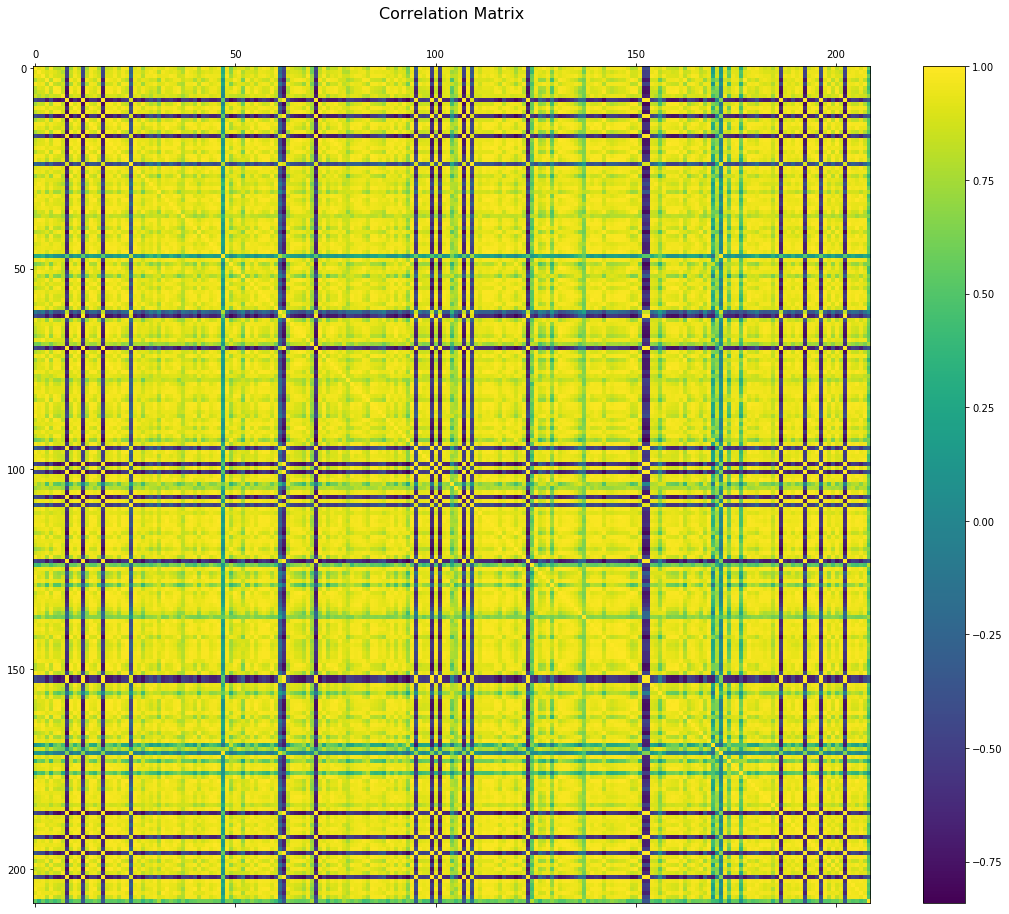

In [68]:
f = plt.figure(figsize=(19, 15))
plt.matshow(pivoted_GDP_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We then try to clusterize this correlation matrix in order to find countries whose GDP are correlated:

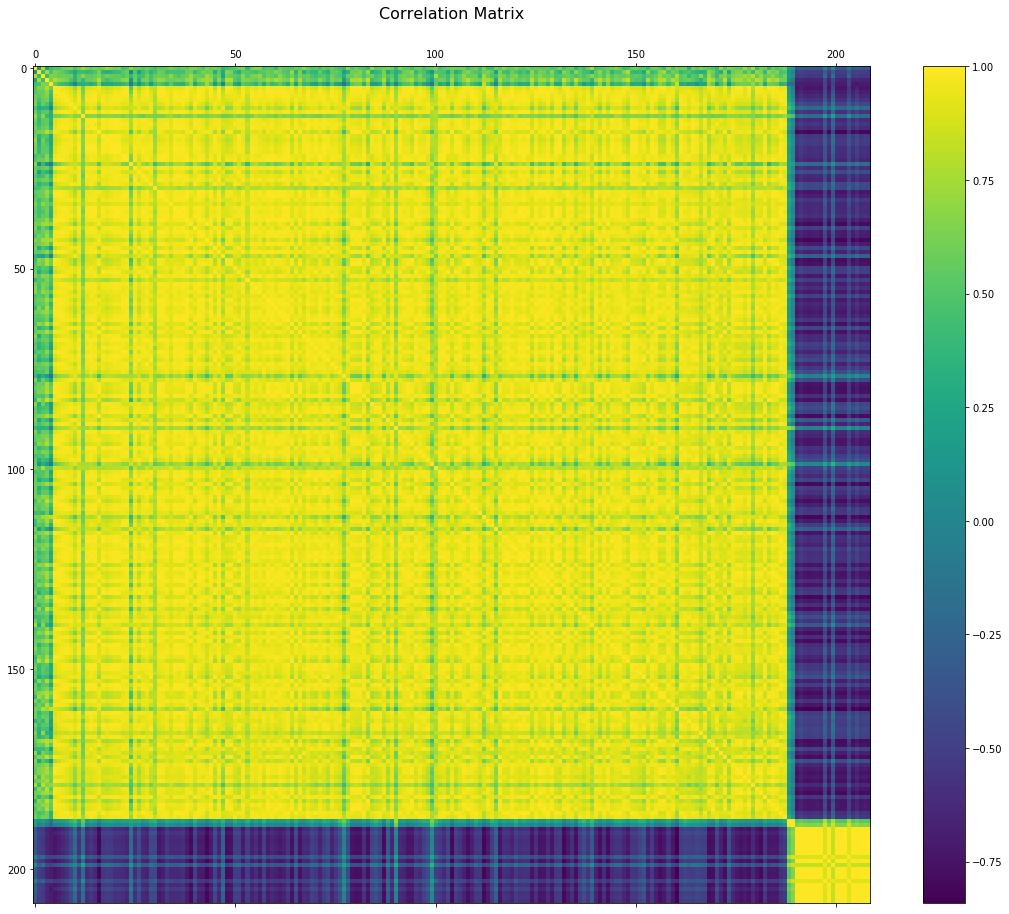

In [69]:
corr = pivoted_GDP_df.corr().values
pdist = spc.distance.pdist(corr)   # vector of ('55' choose 2) pairwise distances
linkage = spc.linkage(pdist, method='complete')
ind = spc.fcluster(linkage, 0.32*pdist.max(), 'distance')
columns = [pivoted_GDP_df.columns.tolist()[i] for i in list((np.argsort(ind)))]
clusterised_df = pivoted_GDP_df.reindex(columns, axis=1)

f = plt.figure(figsize=(19, 15))
plt.matshow(clusterised_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We have found regions in which the GDP is highly correlated and between which the correlation coefficent is lower. We could refine the big clusters by iterating this method.

**Interpretation:** The correlation matrix of GDP contains lots of values that are very closed to one. This means that **GDP in two different countries have a trend to evolve the same way**. Therefore, we can say that the world countries have **strong enough trading relations** to make the GDP evolve the same way. The fact that we have found some **main clusters** could be interpreted as regions in which the **trading relations are more important**.

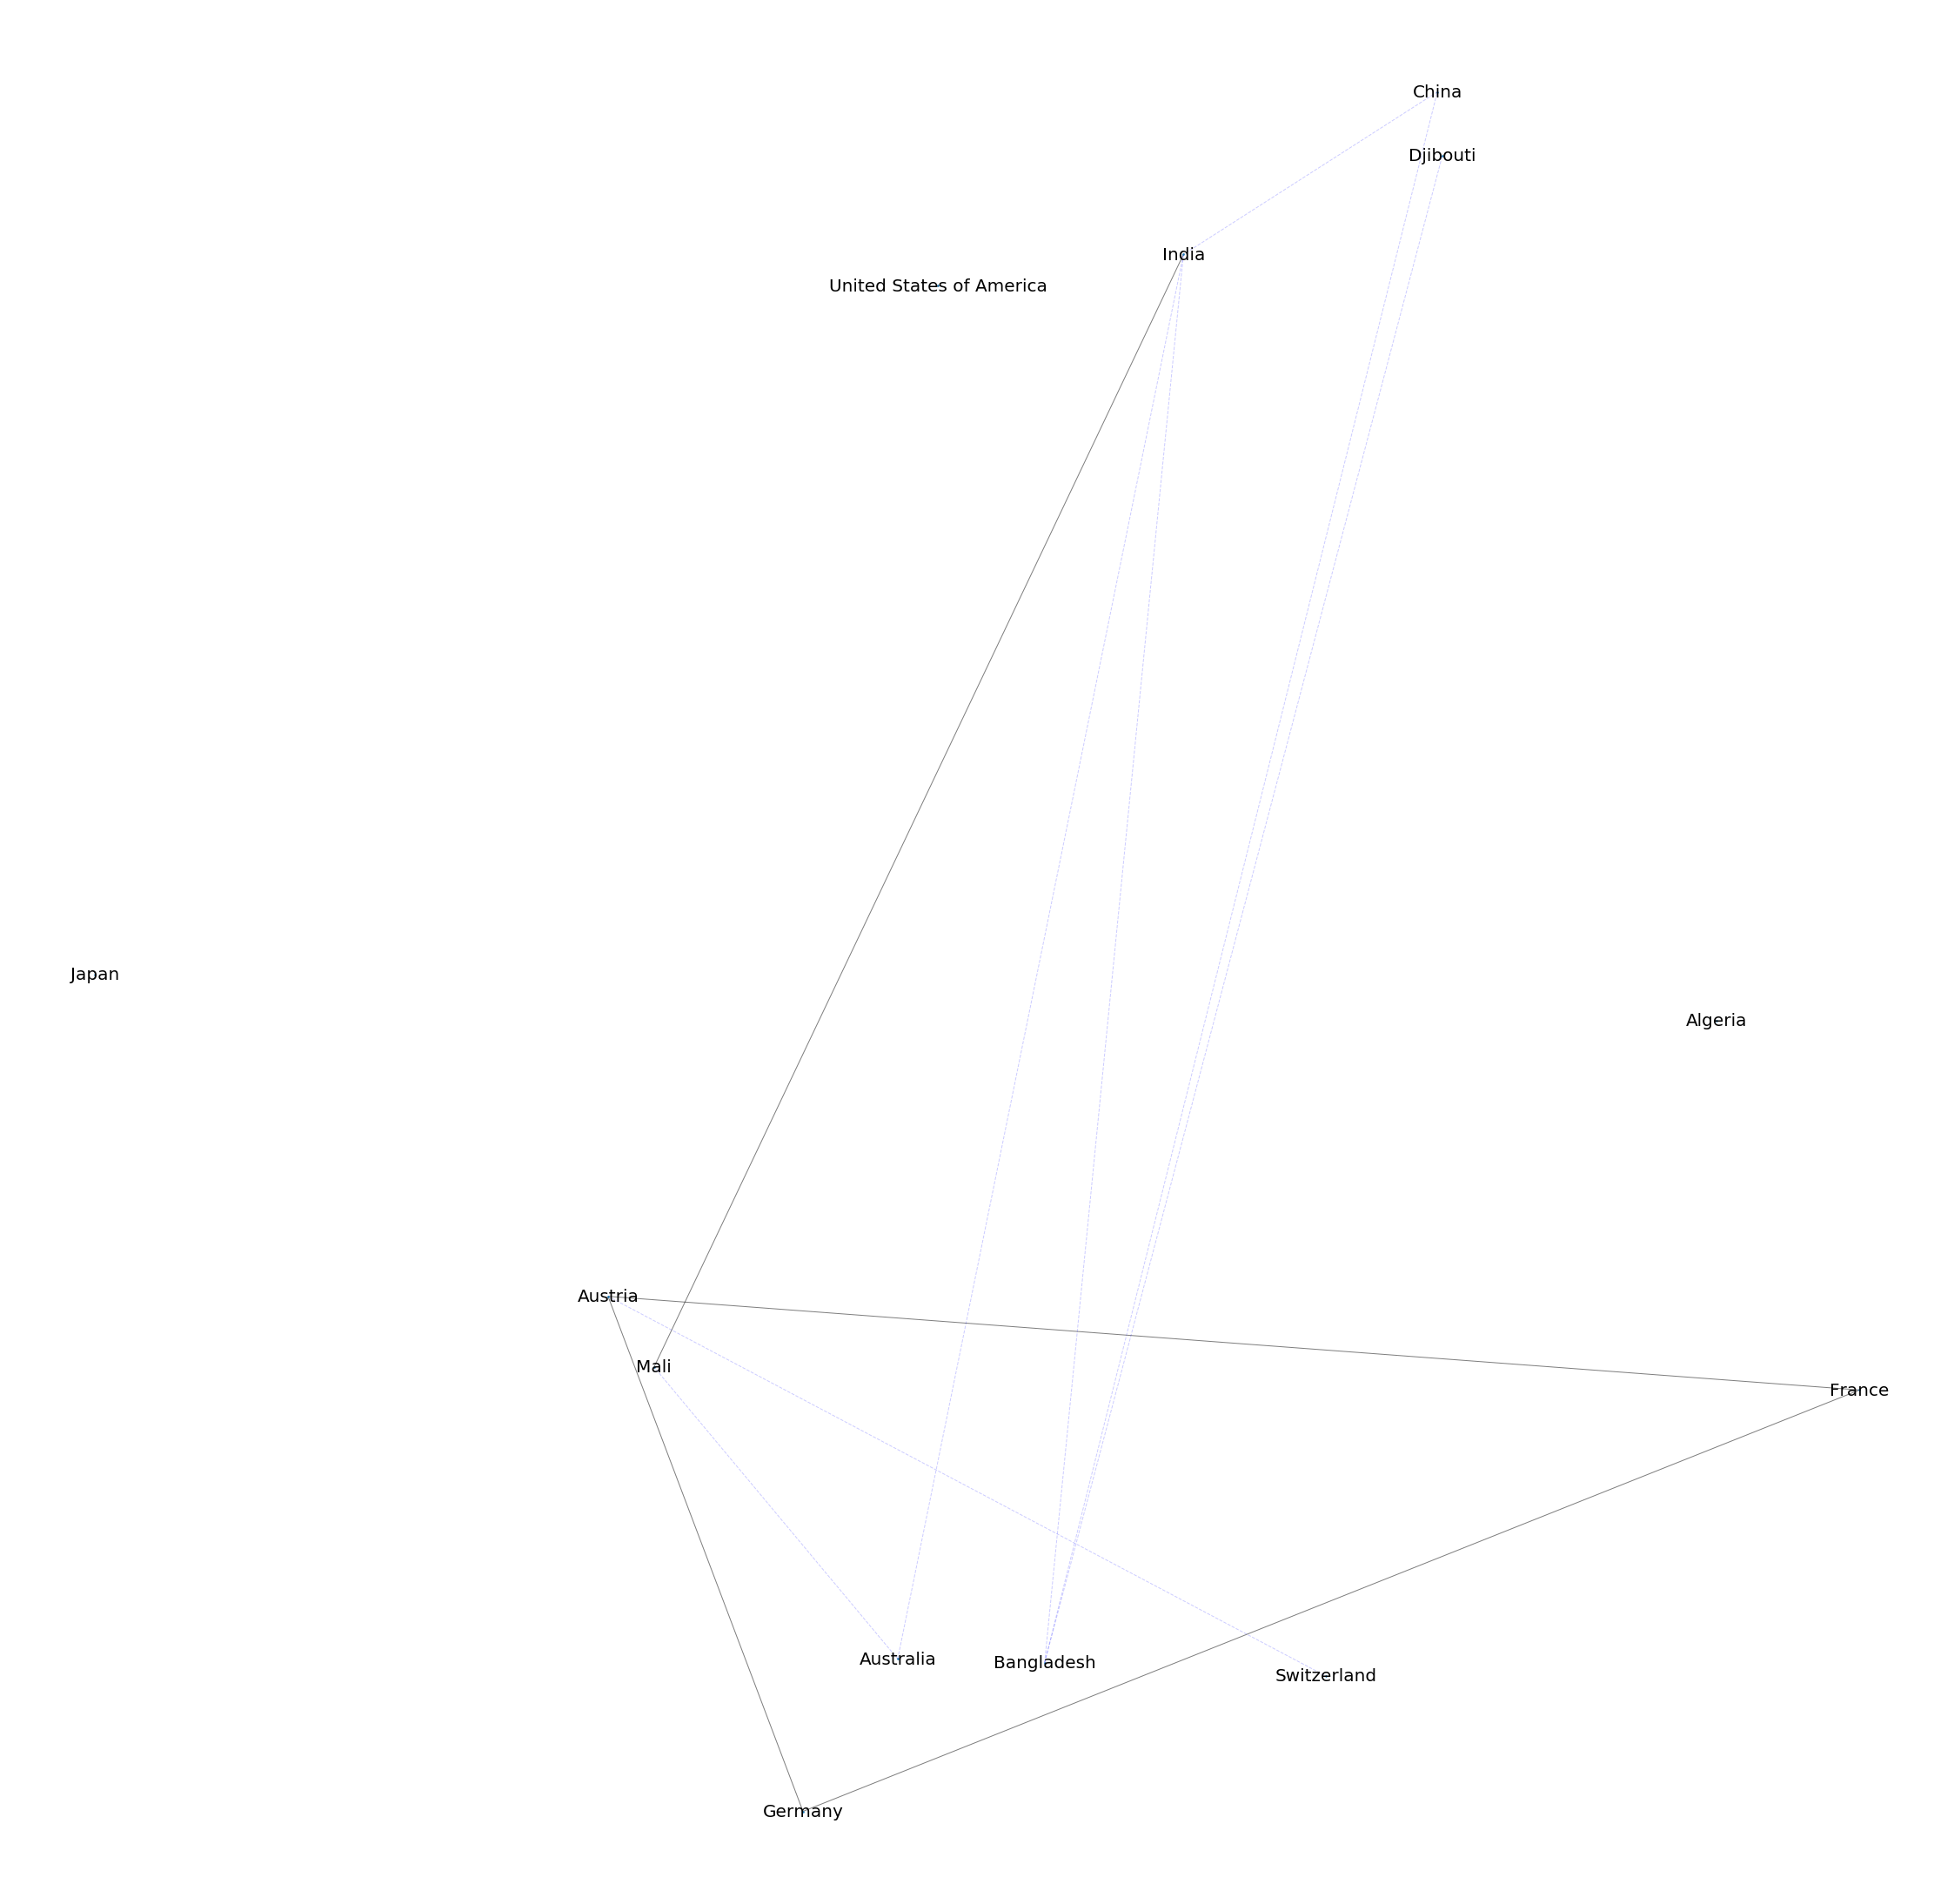

In [70]:
import networkx as nx


plt.figure(figsize=(40,40))

selected_countries = ['Algeria', 'Australia', 'Austria', 'Bangladesh', 'China',
                      'Djibouti', 'France', 'Germany', 'India', 'Japan', 'Mali',
                      'Switzerland', 'United States of America']

G =  nx.from_pandas_adjacency(pivoted_GDP_df[selected_countries].corr())

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.99]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0.98 < d['weight'] <= 0.99]

pos = nx.spring_layout(G, k=0.01185)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_shape='.')

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=1, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=1, alpha=0.2, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()


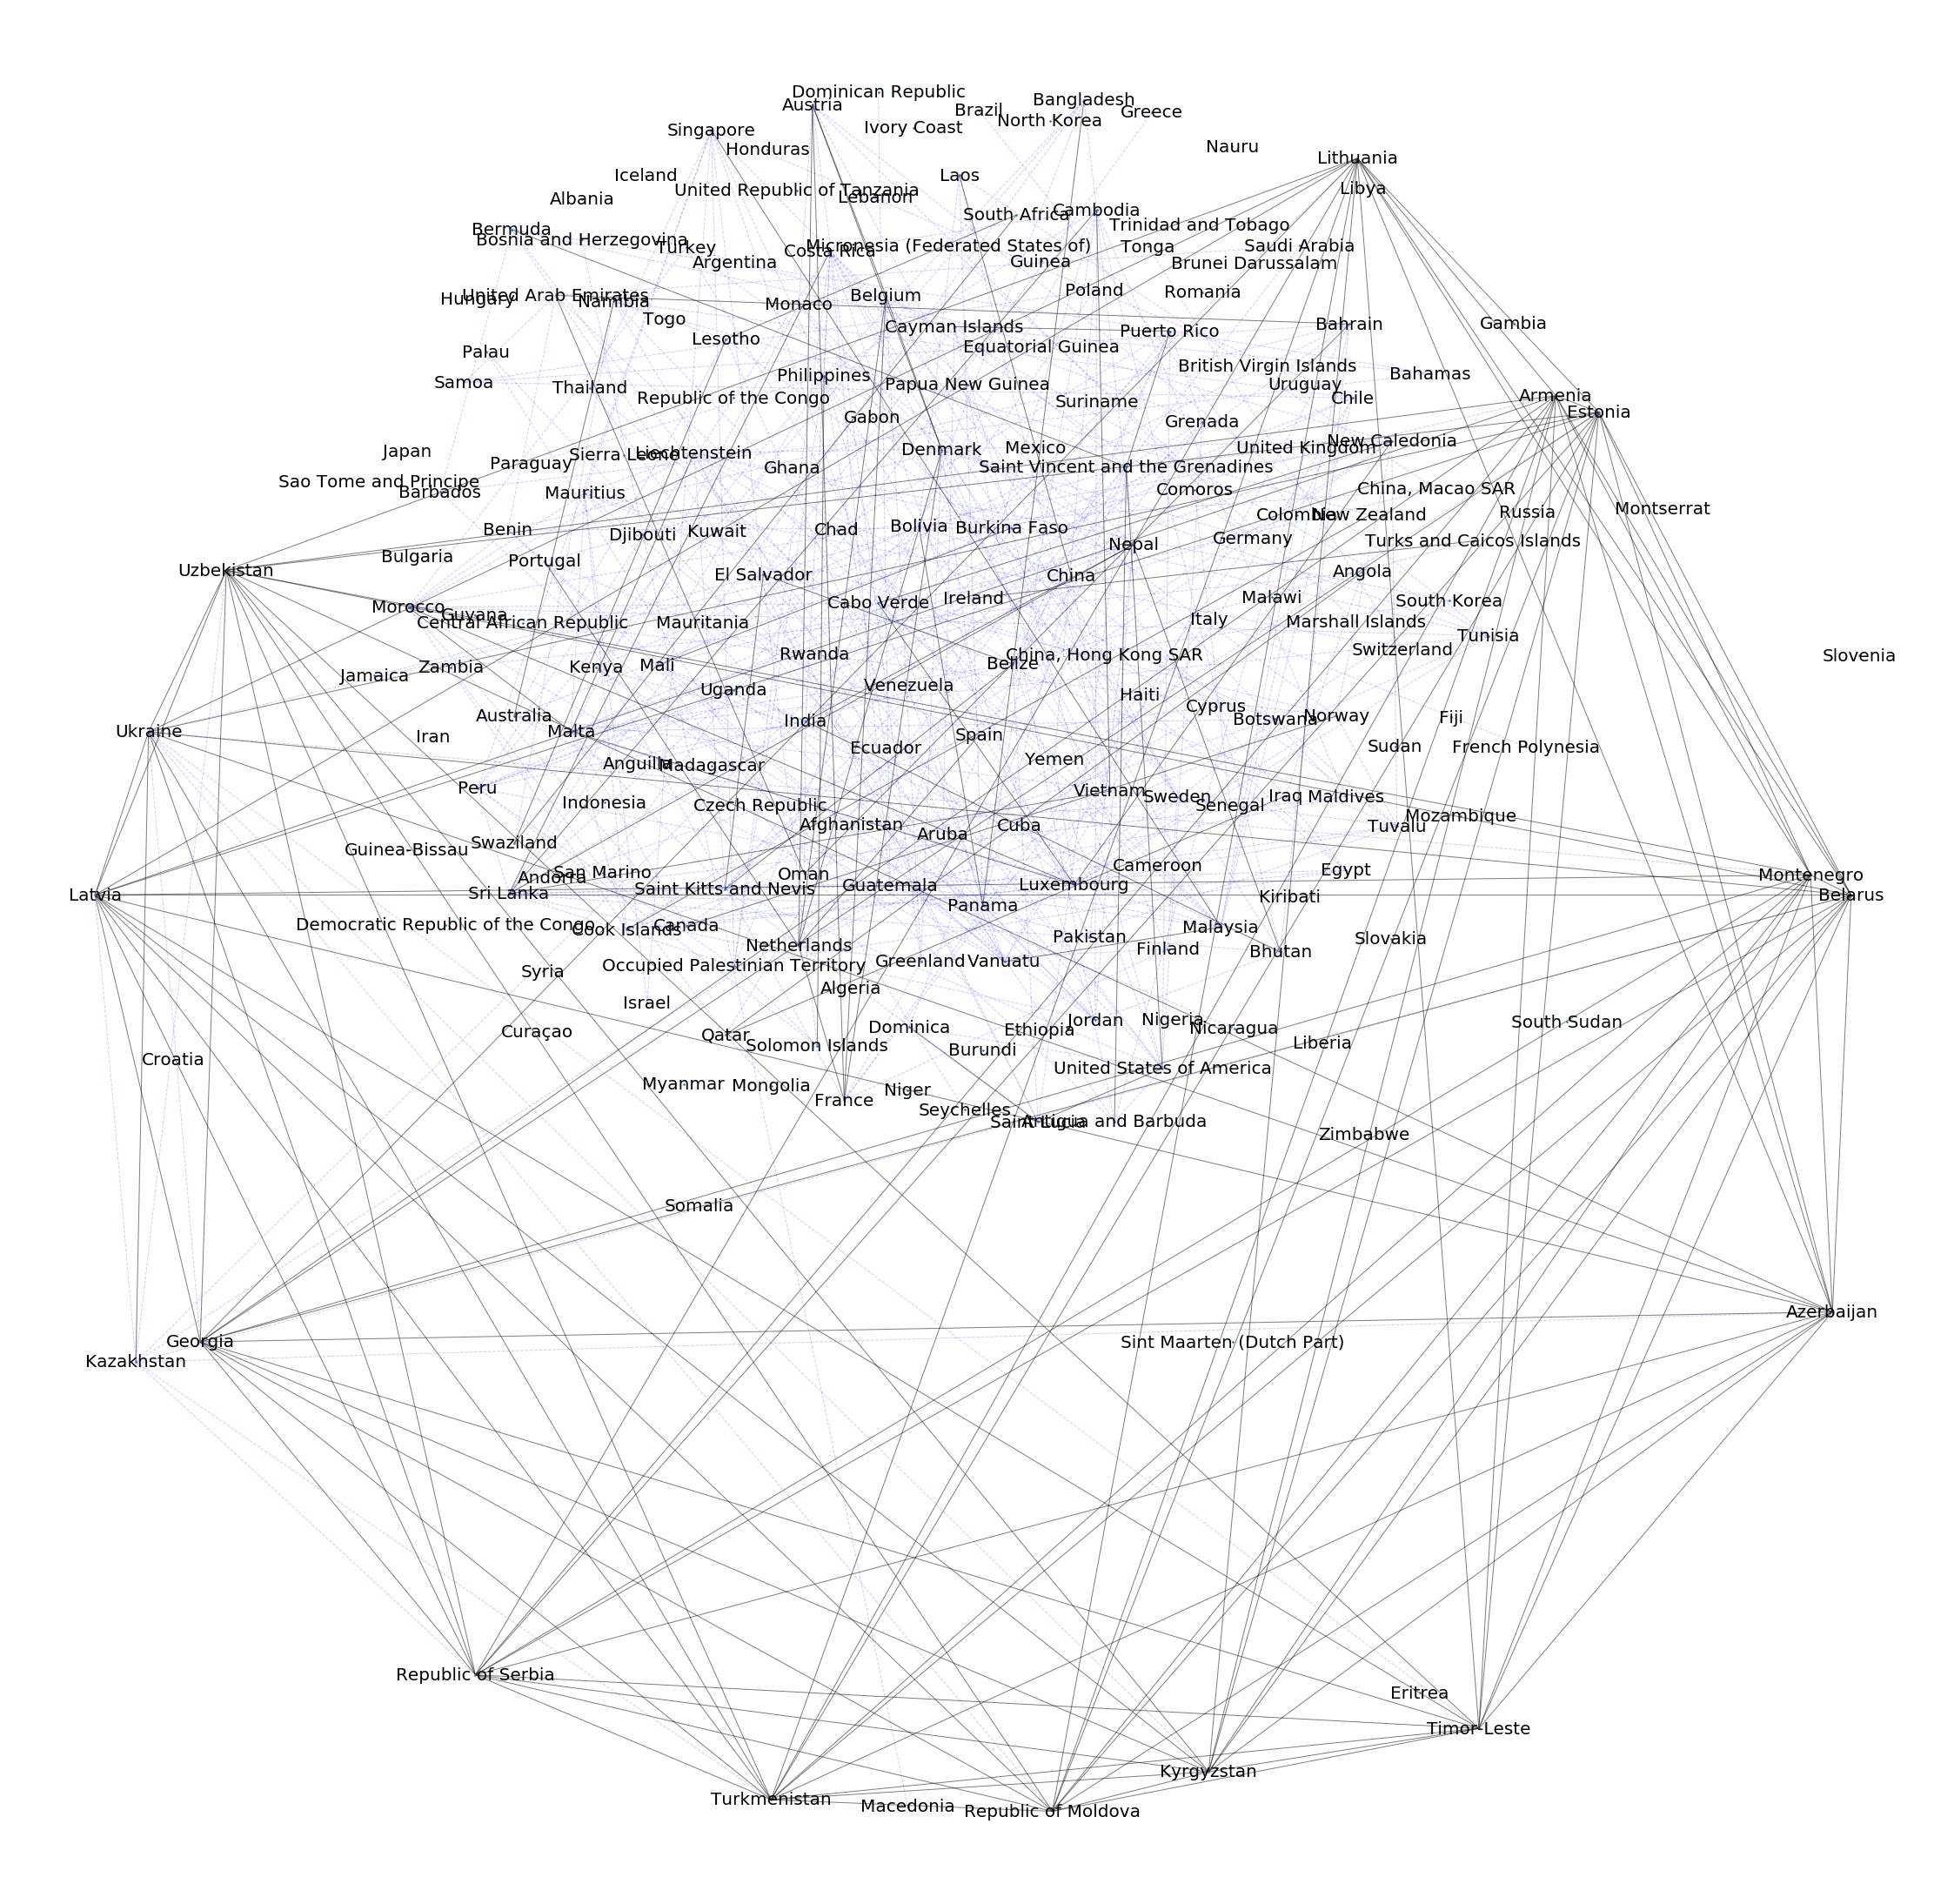

In [71]:
plt.figure(figsize=(40,40))

G =  nx.from_pandas_adjacency(pivoted_GDP_df.corr())

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.995]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0.99 < d['weight'] <= 0.995]

pos = nx.spring_layout(G, k=2)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_shape='.')

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=1, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=1, alpha=0.2, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

#### 2.D. Economic classification of countries <a name="2D"></a>
Below, we plot the distribution of GDP over the world for the last decades:

In [72]:
plot = uni_df[['Area','Year']]
plot["Value"] = uni_df["(GDP, million $)"]
interact(lambda x: visualise_world_data_folium(plot,'Value',x,'GDP [Mil USD]'),x=(1990,2010,1))

interactive(children=(IntSlider(value=2000, description='x', max=2010, min=1990), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

The countries with high **GDP** indeed correpond to the most **developped countries**. The **trends we can observe** from those plots look **very significant** (USSR dissolution, China economic growth, ...)

# 3. Descriptive analysis <a name='3'></a>
3. 
    1. [Identifying the most important features](#3A)
        1. [Feature selection and model fiting](#3Aa)
        2. [Results](#3Ab)
    2. [Where are the most important features produced?](#3B)
    3. [Who are net importers and exporters of the features of interest?](#3C)
    4. [How is the self sufficiency distributed for the selected features?](#3D)
    

### A. Identifying the most important features<a name='3A'></a>

  a. Feature selection and mode fitting <a name='3Aa'></a>

In [73]:

def create_target_and_covariate_df(path_to_pkl):
    '''
    path_to_pkl: path to the pickle file.
    outputs two dataframes, one for the independant variables one for the dependant variables
    '''
    
    uni_df = pd.read_pickle(path_to_pkl)
    uni_df = uni_df.drop(columns=['Area', 'Year'])
    target_variables_df = uni_df[['(GDP, million $)', '(Consumer price indices, %)']]
    covariates_df = uni_df.drop(columns=['(GDP, million $)', '(Consumer price indices, %)'])
    
    return covariates_df, target_variables_df


def drop_feature_pearson_correlation(threshold, target_variable, target_variable_name, dataframe):
    
    '''
    threshold: the minimum amount of correlation required to keep the feature
    target_variable_name: string GDP or CPI
    normalised_dataset: the normalised dataset of feature
    target_variable: pandas series that contains the value of the target_varibale_name
    that we add to the normalised dataset
    
    '''
    copy_dataframe = dataframe.copy()
    copy_dataframe[target_variable_name] = target_variable
    cor = copy_dataframe.corr()
    cor_target = abs(cor[target_variable_name])
    
    relevant_features = cor_target[cor_target > threshold]
    
    return list(relevant_features.keys())

def drop_too_corelated_featues(threshold, dataframe):
    
    corr_matrix = dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return dataframe.drop(dataframe[to_drop], axis=1)
    

def feature_augmentation(degree, covariates_df):
    poly = PolynomialFeatures(degree)
    output_nparray =  poly.fit_transform(covariates_df)

    
    output_df = pd.DataFrame(output_nparray, columns = poly.get_feature_names(covariates_df.columns))
    
    return output_df

def split_and_standardization_dataset(target_variables, covariates, test_size, random, type_return = 'numpy'  ):
    
    '''
    
    target_variables: pandas dataframe that contains the target variables
    covariates: pandas dataframe that contains the independant variables
    test_size: the proportion of the dataset to include in the test split
    type_return: 'numpy' if return numpy array, 'pandas' if return pandas dataframe
    '''
    target_variables_numpy = target_variables.to_numpy()
    covariates_numpy = covariates.to_numpy()
    X_train, X_test, Y_train, Y_test = train_test_split(covariates_numpy, target_variables_numpy, test_size=test_size, random_state = random)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_normalized = scaler.transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    if type_return == 'numpy':
        
        return X_train_normalized, X_test_normalized, Y_train, Y_test
    
    elif type_return == 'pandas':
        
        X_test_normalized_df = pd.DataFrame(X_test_normalized, columns = list(covariates.columns))
        X_train_normalized_df = pd.DataFrame(X_train_normalized,columns= list(covariates.columns))
        Y_train_df = pd.DataFrame(Y_train, columns= list(target_variables.columns))
        Y_test_df = pd.DataFrame(Y_test, columns= list(target_variables.columns))
        
        return X_train_normalized_df, X_test_normalized_df, Y_train_df, Y_test_df

def fit_model_lasso(regularisation_parameters, covariates_df, target_df, nb_fold_CV):
    
    lasso = Lasso()
    
    parameters = {'alpha': regularisation_parameters}
    
    lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = nb_fold_CV)
    lasso_regressor.fit(covariates_df, target_df)

    best_param = lasso_regressor.best_params_['alpha']
    print('The best regularization parameter is ', best_param)


    lasso = Lasso(alpha=best_param)
    lasso.fit(covariates_df, target_df)
    return lasso.coef_
    
    
    
def RFECV_lasso_2(covariate, target,  random, nb_fold = 5,):
    
    cols = list(covariate.columns)
    X_train_, X_test_, Y_train_, Y_test_ = split_and_standardization_dataset(target, covariate, 0.2, type_return='numpy', random = random)
    #print('shape of Y_train_', Y_train_.shape, 'type of Y_train_', type(Y_train_))
    model = Lasso()
    
    rfecv = RFECV(estimator = model, step = 1, cv = nb_fold, scoring = 'neg_mean_squared_error')
    rfecv.fit(X_train_, np.ravel(Y_train_))
    print("Optimal number of features : %d" % rfecv.n_features_)
    
    temp = pd.Series(rfecv.support_,index = cols)
    selected_features = temp[temp==True].index

    print(selected_features)
    

    # plt.figure()
    # plt.xlabel("Number of features selected")
    # plt.ylabel("Cross validation score")
    # plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    # plt.show()
        
    return selected_features

In [74]:
def main(target_to_inspect = '(GDP, million $)'):

    RANDOM_SEED = 29
    
    reg_param = np.linspace(start = 0.01, stop= 1, num = 20)

    params = {

        'target' : target_to_inspect ,
        'name of target': 'GDP',
        'pearson correlation threshold': 0.4,
        'inter correlation threshold': 0.9, 
        'nb_fold_CV': 5, 
        'degree augmentation': 1,
        'regularization_parameter': reg_param
    }

    covariates_df, target_variables_df = create_target_and_covariate_df('./Scripts/Data/uni_df.pkl')
    target_variables_df.to_pickle('target.pkl')

    ### Below we select the top 20 features in production:

    Production_cov_df = covariates_df.filter(regex= 'production|Production')
    summed_df = Production_cov_df.sum()
    keys = summed_df.keys()
    values = summed_df.values
    sorted_keys = [key for _,key in sorted(zip(values,keys))]
    Production_cov_df = Production_cov_df[sorted_keys[-20:]]
    selected_features_production = list(Production_cov_df.columns.values) # Selected features for top 20 prod features in volumne

    cropped_word_selected_prod = [" ".join(string.split()[:-3]) for string in selected_features_production] # Same as the list above with only the important words kept


    

   ### Below we are selecting the features in export that have been selected previously with the production
    export_df = covariates_df.filter(regex= 'export')
    

    columns_to_keep_export = []

    for column_export in list(export_df.columns.values):

        for columns_prod in cropped_word_selected_prod:

            if columns_prod in column_export:

                columns_to_keep_export.append(column_export)


    ### Below we are selecting the features in import that have been selected previously with the production
    import_df = covariates_df.filter(regex= 'import')
    

    columns_to_keep_import = []

    for column_import in list(import_df.columns.values):

        for columns_prod in cropped_word_selected_prod:

            if columns_prod in column_import:

                columns_to_keep_import.append(column_import)

    


    final_features_kept = selected_features_production + columns_to_keep_export + columns_to_keep_import  # All the selected features
   
    covariates_df = covariates_df[final_features_kept]
    


    list_selected_features_GDP = drop_feature_pearson_correlation(params['pearson correlation threshold'], target_variables_df[params['target']], params['name of target'], covariates_df)
    covariate_reduced_df = covariates_df[list_selected_features_GDP[:-1]]
    covariate_reduced_df = drop_too_corelated_featues(params['inter correlation threshold'], covariate_reduced_df)
    covariate_reduced_df.to_pickle("reduced_df_2.pkl")
    print('list of selected features after reduction', list(covariate_reduced_df.columns.values))
    
    regularisation_parameters = params['regularization_parameter']

    target_df = target_variables_df[params['target']]

    nb_fold_CV = params['nb_fold_CV']

    param_lasso = fit_model_lasso(regularisation_parameters, covariate_reduced_df, target_df, nb_fold_CV = nb_fold_CV )

    keys = list(covariate_reduced_df.columns.values)
    
    values = param_lasso
   
    return dict(zip(keys, values))

weights=main('(GDP, million $)')

list of selected features after reduction ['Soybeans Crops Production tonnes', 'Tomatoes Crops Production tonnes', 'Maize Crops Production tonnes', 'Turkeys Livestock production Head', 'Maize Food export quantities tonnes', 'Maize, green Food export quantities tonnes', 'Wheat Food export quantities tonnes', 'Cattle Live animals import quantities Head', 'Oats Food import quantities tonnes', 'Pigs Live animals import quantities Head', 'Tomatoes Food import quantities tonnes', 'Turkeys Live animals import quantities Head']
The best regularization parameter is  0.01


In [75]:
weights

{'Soybeans Crops Production tonnes': 0.016904551719883053,
 'Tomatoes Crops Production tonnes': 0.046002998934710805,
 'Maize Crops Production tonnes': 0.01911255597908063,
 'Turkeys Livestock production Head': 0.0004560904920098384,
 'Maize Food export quantities tonnes': -0.06316454222878914,
 'Maize, green Food export quantities tonnes': 52.082838493928364,
 'Wheat Food export quantities tonnes': 0.0075799594660750265,
 'Cattle Live animals import quantities Head': 0.036634547858518524,
 'Oats Food import quantities tonnes': 0.4837657071630522,
 'Pigs Live animals import quantities Head': 0.057761069459018086,
 'Tomatoes Food import quantities tonnes': 2.568655777314171,
 'Turkeys Live animals import quantities Head': 0.04929538371588108}

**Above, we see the features identified as the most important by our regression model**

We find that the  goods that most influence the GDP are soybean, tomatoes, Maize, Wheat , Cattle live animals and pigs amongst other. 

It is an interesting result that is easily understandable. Take soybean for example. This crop is one of the most produced. The mains exporter are the US, Brasil and Argentina and the main importer is China. Around 330 millions tonnes of soybean was produced in 2018. It is vastly used to feed animals. It is thus coherent to see such an important good be selected by our model. We see also that wheat, oats, cattle live and pigs are present. This again is easily understandable. It is sufficient to look at our eating habit to convince ourself that those goods plays an important role in the GDP. 

## B. Where are the most important features produced? <a name='3B'></a>

After having identified the most important features with our prediction model, we want to have a look as to where they are produced.  

The first step is to select to columns corresponding to the production of the features of interest within our dataframe.

In [76]:
features=list(weights.keys())
pickle_file="Scripts/Data/uni_df.pkl"
df=pickle.load(open(pickle_file,'rb'))
df=df.set_index(['Area','Year'])

#To select the production of the features of interest, the dataframe is filtered with each feature. To reduce computation cost, the result is stored in a dictionnary and when all the features are treated turned into
#a pandas DataFrame

dic_to_plot={}

for feature in features:
    
    if 'Production' in feature or 'production' in feature:
        if len(df.filter(regex=feature).columns)==0:
            print('{} not found'.format(c))
        else:
            dic_to_plot.update(df.filter(regex=feature).to_dict())
            
    else:
        s=re.split(' Food| Live',feature)[0]
        cols=[c for c in df.columns if re.split(' Crop| Food| Live',c)[0]==s and re.search('Production|production',c)]
        
        if cols==0:
            print('{} not found'.format(feature))
        else:
            dic_to_plot.update(df[cols].to_dict())
            
prod_to_plot=pd.DataFrame(dic_to_plot)
prod_to_plot=prod_to_plot.reset_index().rename(columns={'level_0':'Area','level_1':'Year'})

#### Let's dive into the maps!

In [77]:
columns=[c for c in prod_to_plot.columns if c!='Area' and c!='Year']
for c in columns:
    print(c)
    display(interact(lambda x : visualise_world_data_folium(prod_to_plot,c,x,c,log2=True),x=(1970,2014,1)))


Soybeans Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Tomatoes Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Maize Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Turkeys Livestock production Head


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Maize, green Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Wheat Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Cattle Livestock production Head


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Oats Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Pigs Livestock production Head


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Globally, all features that we identified seem to follow a common trend. The biggest producers are in almost all categories China, the USA and brazil. Russia, France, Spain, Germany seem to get closer to their volumes. The rest of Europe is situated in the second or third tier of producer as well as the other developed countries (Australia, Canada, south American countries). In the majority of categories, north and south African countries are situated in the some orders of magnitude as developed countries. A general trend to observe is that central African countries seem to produce very few resources in comparison to the rest of the world. The only feature going against this general description seems to be the cattle. The production of cattle appears to be very well distributed throughout the world. The production of pigs also seem well distributed throughout the world except for countries excluding pork from their diet for religious purposes. The phenomenon might be explained by the increased difficulty in transporting these goods. Live animals and meat transport is much more complicated than grain, vegetables or forage. Meaning that the countries would generally produce what they need in term of meat and rather import crops or vegetables.  

The general trend we observe is that developed countries are bigger producers. This makes sense considering how we selected these features. Our regression model gives us the features that are connected with a high GDP thus the features selected will be markers of rich countries.

What can be found surprising is the stability of the producer ranking throughout the years. The top producers 50 years ago are still the top producers nowadays. It is also worth noting that globally, even though the ranking does not change, the sheer production volume follows a growing trend.

In [78]:
#Exporting the results as HTML files
import os
import shutil

#Generate result files

#if needed, creating result directory
if not os.path.exists('./Scripts/Data/ResultsJulien'):
    os.mkdir('./Scripts/Data/ResultsJulien')
if not os.path.exists('./Scripts/Data/ResultsJulien/Producers'):
        os.mkdir('./Scripts/Data/ResultsJulien/Producers')
        
for c in prod_to_plot.columns:
    if c!='Year' and c!='Area':
        
        #if the dir already exists, remove it and create fresh one
        if os.path.exists('./Scripts/Data/ResultsJulien/Producers/{}'.format(c)):
            shutil.rmtree('./Scripts/Data/ResultsJulien/Producers/{}'.format(c))
        #wait for the deletion to be complete
        while os.path.exists('./Scripts/Data/ResultsJulien/Producers/{}'.format(c)):
            continue
        os.mkdir('./Scripts/Data/ResultsJulien/Producers/{}'.format(c))
        
        for year in range(1970,2015,1):
            m=visualise_world_data_folium(prod_to_plot,c,year,c,log2=True)
            save_name='./Scripts/Data/ResultsJulien/Producers/{}/{}_{}.html'.format(c,c,year)
            m.save(save_name)

In [79]:
def plot_trend_production(prod_to_plot,production_elt):
    
    prod_to_plot = prod_to_plot[prod_to_plot["Year"] < 2014]#years after 2014 dont contain relevant data
    
    #select the 10 countries that produced the more since 1990
    countries=list(prod_to_plot[prod_to_plot["Year"] >1990][["Area",production_elt]]#1990 after the end of ussr
                   .groupby("Area")
                   .sum()
                   .sort_values(by=production_elt,ascending=False)
                   .reset_index()
                   .head(10)["Area"])
    
    prod_to_plot.sort_values(by='Year', inplace=True)
    fig, ax = plt.subplots(figsize=(10,5))

    for c in countries:
        prod_to_plot[prod_to_plot.Area==c].plot(x="Year",
                                                  y=production_elt,
                                                  kind="line", ax=ax)
    _ = ax.set_title(f'{production_elt}' )
    _ = ax.legend(countries, loc = 'upper left')
    return ax

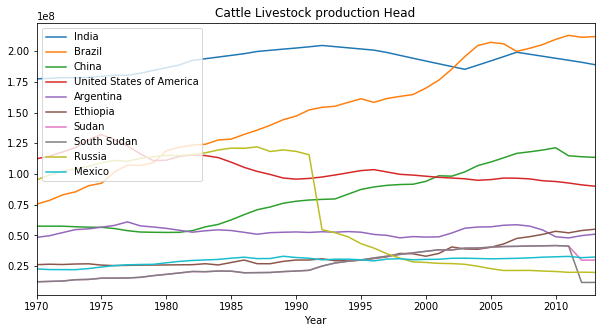

In [80]:
plot_trend_production(prod_to_plot,'Cattle Livestock production Head')


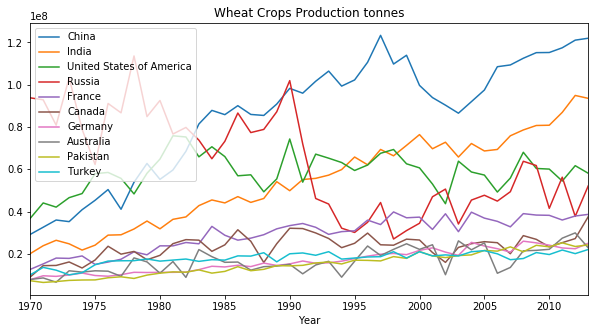

In [81]:
plot_trend_production(prod_to_plot,'Wheat Crops Production tonnes')

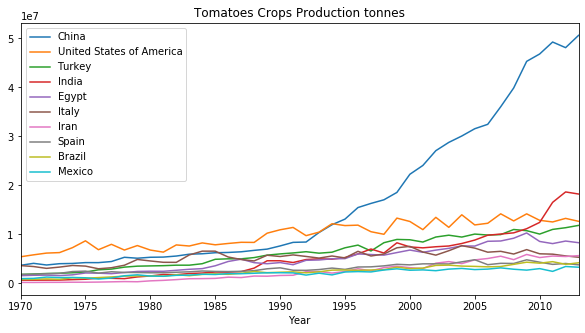

In [82]:
plot_trend_production(prod_to_plot,'Tomatoes Crops Production tonnes')

## C.  Who are the importers and exporters of the features of interest? <a name="3C"></a>

For the next milestone, this part will be put to the end of the file and conducted for **specific agricultural features** (e.g. trade of crop most highly correlated to GDP) after the **most important ones** have been **identified**.

In [83]:
def net_import_export(uni_df,weights):
    
    #This method return a dataframe containing the net trade balance for each country for each year for the features of interest
    
    exports_df=uni_df.set_index(['Area','Year']).filter(regex="export")
    imports_df=uni_df.set_index(['Area','Year']).filter(regex="import")

    e_cols=[]
    i_cols=[]
    popped=[]
    for feature in weights.keys():
        if feature not in popped:
            s=re.split(' Food| Live| Crops',feature)[0]
            for f in features:
                f_split=re.split(' Food| Live| Crops',f)[0]
                if f_split==s:
                    popped.append(f)
            e_cols.extend([c for c in list(exports_df.columns) if re.split(' Food| Live| Crops',c)[0]==s])
            i_cols.extend([c for c in list(imports_df.columns) if re.split(' Food| Live| Crops',c)[0]==s])

    exports_df=exports_df[e_cols]
    imports_df=imports_df[i_cols]

    e_col_dic={c:re.split(' Food| Live| Crops',c)[0] for c in exports_df.columns}
    i_col_dic={c:re.split(' Food| Live| Crops',c)[0] for c in imports_df.columns}



    exports_df=exports_df.rename(columns=e_col_dic)
    imports_df=imports_df.rename(columns=i_col_dic)

    net_df=exports_df.subtract(imports_df)
    
    return net_df

In [84]:
net_df =net_import_export(uni_df,weights)
net_df.reset_index(inplace=True)

for c in net_df.columns:
    if c!='Year' and c!='Area':
        #print(c,'\n')
        display(interact(lambda x : visualise_world_data_folium(net_df,c,x,c+" [Tonnes or Heads]",log2=True),x=(1970,2014,1)))

interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

In [97]:
def plot_trend_import_export(net_df, imported_and_exported_elt, area1, area2, area3, area4):
    net_df = net_df[net_df["Year"] < 2014]
    select_area1 = net_df['Area']== area1
    select_area2 = net_df['Area']== area2
    select_area3 = net_df['Area']== area3
    select_area4 = net_df['Area']== area4
    ax = net_df[select_area1].plot(x ='Year', y=imported_and_exported_elt, kind = 'line')
    ax = net_df[select_area2].plot(x ='Year', y=imported_and_exported_elt, kind = 'line', ax=ax)
    ax = net_df[select_area3].plot(x ='Year', y=imported_and_exported_elt, kind = 'line', ax=ax)
    ax = net_df[select_area4].plot(x ='Year', y=imported_and_exported_elt, kind = 'line', ax=ax)
    _ = ax.set_title(imported_and_exported_elt+' net export in Tonnes/Head for different countries for the period 1970-2015')
    _ = ax.legend([area1, area2, area3, area4])


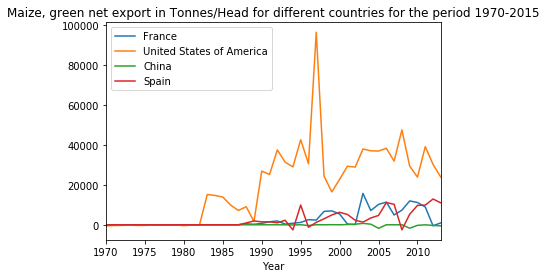

In [98]:

plot_trend_import_export(net_df, 'Maize, green', 'France', 'United States of America', 'China', 'Spain')

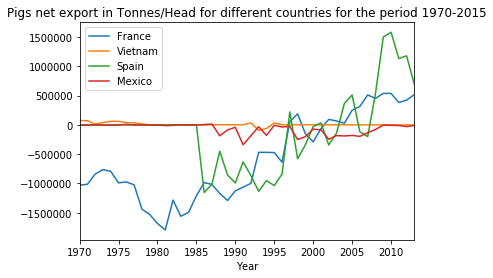

In [100]:
plot_trend_import_export(net_df,'Pigs', 'France', 'Vietnam', 'Spain', 'Mexico')

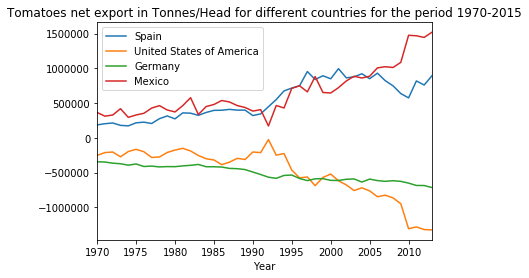

In [101]:
plot_trend_import_export(net_df,'Tomatoes', 'Spain', 'United States of America', 'Germany', 'Mexico')

In [104]:
#Exporting the results as HTML files
import os
import shutil

#Generate result files

#if needed, creating result directory
if not os.path.exists('./Scripts/Data/ResultsJulien'):
    os.mkdir('./Scripts/Data/ResultsJulien')
if not os.path.exists('./Scripts/Data/ResultsJulien/Trade'):
        os.mkdir('./Scripts/Data/ResultsJulien/Trade')
        
for c in net_df.columns:
    if c!='Year' and c!='Area':
        
        #if the dir already exists, remove it and create fresh one
        if os.path.exists('./Scripts/Data/ResultsJulien/Trade/{}'.format(c)):
            shutil.rmtree('./Scripts/Data/ResultsJulien/Trade/{}'.format(c))
        #wait for the deletion to be complete
        while os.path.exists('./Scripts/Data/ResultsJulien/Trade/{}'.format(c)):
            continue
        os.mkdir('./Scripts/Data/ResultsJulien/Trade/{}'.format(c))
        
        for year in range(1970,2014,1):
            m=visualise_world_data_folium(net_df,c,year,c,log2=True)
            save_name='./Scripts/Data/ResultsJulien/Trade/{}/{}_{}.html'.format(c,c,year)
            m.save(save_name)

## D. How is the self sufficiency distributed for the selected features? <a name="3D"></a>
In this chapter, we take a look at the self suficiency score of the countries around the world and we focus on the agricultural features identified by our model.

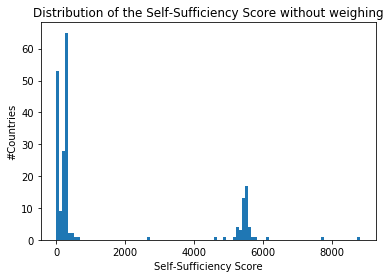

In [113]:
pickle_file="Scripts/Data/uni_df.pkl"
df=pickle.load(open(pickle_file,'rb'))
sc=compute_self_suficiency(df,weights, True)
sc.reset_index(inplace=True)
sc=sc.rename(columns={'level_0':'Area','level_1':'Year'})


## self-sufficiency in 2012 with weights
sc_plots= sc[sc["Year"] == 2012]

plt.xlabel('Self-Sufficiency Score')
plt.ylabel('#Countries')
plt.title('Distribution of the Self-Sufficiency Score without weighing')
_ = plt.hist(sc_plots['Agg'], bins=100)



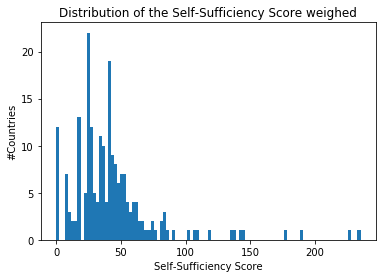

In [114]:
pickle_file="Scripts/Data/uni_df.pkl"
df=pickle.load(open(pickle_file,'rb'))
sc=compute_self_suficiency(df,weights)
sc.reset_index(inplace=True)
sc=sc.rename(columns={'level_0':'Area','level_1':'Year'})

## self-sufficiency in 2012 without weights
sc_plots= sc[sc["Year"] == 2012]

plt.xlabel('Self-Sufficiency Score')
plt.ylabel('#Countries')
plt.title('Distribution of the Self-Sufficiency Score weighed')
_ = plt.hist(sc_plots['Agg'], bins=100)

As seen in the histograms, the unweighted score seems to make more sense, because the values obtained by weighing creates two clusters of countries, which don't make much sense. 

In [115]:
interact(lambda x: visualise_world_data_folium(sc,'Agg',x,'Self Sufficiency score',log2=True),x=(1970,2015))

interactive(children=(IntSlider(value=1992, description='x', max=2015, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Unlike the production ranking, the self sufficiency score seems to be pretty instable. It is interesting to note that the countries who were by far top producers do no stand out early on. For instance China does not appear in the highest score until 1990. The most surprising results come from African countries such as South Africa, the United Republic of Tanzania, Nigeria and the Ivory Coast that constantly have a score competing with the richest countries which was unexpected. Even though the general trend tends to show that richer countries are more independent, there are outliers and the score seems to have a pretty high variance

In [108]:
# This field generates the results and exports them as HTML files (1 map per year)

import os
import shutil

#Generate result files

#if needed, create result directories
if not os.path.exists('./Scripts//Data/ResultsJulien'):
    os.mkdir('./Scripts/Data/ResultsJulien')
    
#if directory already exists delete it
if os.path.exists('./Scripts/Data/ResultsJulien/SelfSufficiency'):
    shutil.rmtree('./Scripts/Data/ResultsJulien/SelfSufficiency')

#While loop necessary to wait until the tree is deleted
while os.path.exists('./Scripts/Data/ResultsJulien/SelfSufficiency'):
    continue
    
os.mkdir('./Scripts/Data/ResultsJulien/SelfSufficiency')
    

for year in range(1970,2016,1):
            m=visualise_world_data_folium(sc,'Agg',year,'Self Sufficiency Score',log2=True)
            save_name='./Scripts/Data/ResultsJulien/SelfSufficiency/self_suf_{}.html'.format(year)
            m.save(save_name)

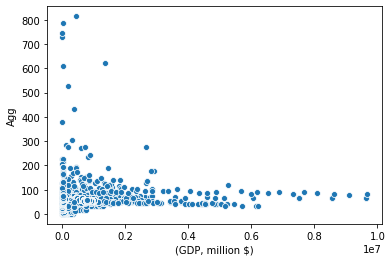

In [141]:
#Correlating Self-sufficiency with GDP

self_df = sc.copy()
uni_df = pd.read_pickle("Scripts/Data/uni_df.pkl")
Value_of_interest = uni_df[['(GDP, million $)', '(Consumer price indices, %)', 'Area', 'Year']]
#print("col self", self_df.columns)


merge_df = pd.merge(Value_of_interest, self_df,  how='left', left_on=['Area','Year'], right_on = ['Area','Year'])
merge_df = merge_df[merge_df['(GDP, million $)'] < 10000000 ]
merge_df = merge_df[merge_df['Agg'] < 1000 ]
merge_df = merge_df[merge_df['Agg'] > 0 ]
#print('mrge col', merge_df.columns)

merge_df['CPI_rank'] = merge_df['(Consumer price indices, %)'].rank(ascending=False)
merge_df['AGG_rank'] = merge_df['Agg'].rank(ascending = False)
#print(merge_df)
test_df = merge_df
#test_df = merge_df.loc[merge_df['Year'] == 2000]
ax = sns.scatterplot(x='(GDP, million $)', y="Agg", data=test_df)
plt.show()



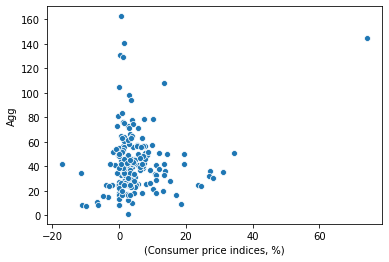

In [130]:
#Correlating Self-sufficiency with CPI

self_df = sc.copy()
uni_df = pd.read_pickle("Scripts/Data/uni_df.pkl")
Value_of_interest = uni_df[['(GDP, million $)', '(Consumer price indices, %)', 'Area', 'Year']]
#print("col self", self_df.columns)


merge_df = pd.merge(Value_of_interest, self_df,  how='left', left_on=['Area','Year'], right_on = ['Area','Year'])
merge_df = merge_df[merge_df['(Consumer price indices, %)'] < 100 ]
merge_df = merge_df[merge_df['Agg'] < 10000 ]
merge_df = merge_df[merge_df['Agg'] > 0 ]
#print('mrge col', merge_df.columns)

merge_df['CPI_rank'] = merge_df['(Consumer price indices, %)'].rank(ascending=False)
merge_df['AGG_rank'] = merge_df['Agg'].rank(ascending = False)
#print(merge_df)

test_df = merge_df.loc[merge_df['Year'] == 2010]
ax = sns.scatterplot(x='(Consumer price indices, %)', y="Agg", data=test_df)
plt.show()


This leads nowhere....